<a id='Desc'></a>
# Project description
In this project, we will work for an online store, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

In front of us is data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether we're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

<a id='Contents'></a>
# Contents

[Project Description](#Desc)

[Step 1. Open the data file and study the general information](#Step1)
- [1.1. Data description from data sheet and variable types](#1.1.)
- [1.2. Step Conclusion](#1.2.)

[Step 2. Prepare the data](#Step2)
- [2.1.Missing Values](#2.1.)
- [2.2. Duplicated Values](#2.2.)
- [2.3. Outliers](#2.3.)
- [2.4. Step Conclusion](#2.4.)

[Step 3. Analyze the data](#Step3)
- [3.1. Answering the Questions](#3.1.)
    - [3.1.1. Looking at how many games were released in different years](#3.1.1.)
    - [3.1.2. Looking at how sales varied from platform to platform](#3.1.2.)
    - [3.1.3. Determining what period we should take data for](#3.1.3.)
    - [3.1.4. Working only with the data that we've decided is relevant](#3.1.4.)
    - [3.1.5. Which platforms are leading in sales? Which ones are growing or shrinking](#3.1.5.)
    - [3.1.6. Building a box plot for the global sales of all games, broken down by platform](#3.1.6.)
    - [3.1.7. Taking a look at how reviews affect sales for one popular platform](#3.1.7.)
    - [3.1.8. Comparing the sales of the same games on other platforms](#3.1.8.)
    - [3.1.9. Taking a look at the general distribution of games by genre](#3.1.9.)
- [3.2. Step Conclusion](#3.2.)

[Step 4. Create a user profile for each region](#Step4)
- [4.1. Analysis the platforms and genres](#4.1.)
- [4.2. Step Conclusion](#4.2.)

[Step 5. Test of the hypotheses ](#Step5)
- [5.1 Average user ratings of the Xbox One and PC platforms are the same.](#5.1.)
    - [5.1.1. Levene Test](#5.1.1.)
    - [5.1.2. T-Test](#5.1.2.)
- [5.2 Average user ratings for the Action and Sports genres are different](#5.2.)
    - [5.2.1. Levene Test](#5.2.1.)
    - [5.2.2. T-Test](#5.2.2.)
- [5.3. Step Conclusion](#5.3.)

[Step 6. General Conclusion](#Step6)

<a id='Step1'></a>
# Step 1. Open the data file and study the general information

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display, Image

In [2]:
try:
    games = pd.read_csv('D:/workspace/datasets/games.csv')
    
except:
    games = pd.read_csv('games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games.head())

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [5]:
display(games.describe().T)

count         mean        std     min     25%      50%  \
Year_of_Release  16446.0  2006.484616   5.877050  1980.0  2003.0  2007.00   
NA_sales         16715.0     0.263377   0.813604     0.0     0.0     0.08   
EU_sales         16715.0     0.145060   0.503339     0.0     0.0     0.02   
JP_sales         16715.0     0.077617   0.308853     0.0     0.0     0.00   
Other_sales      16715.0     0.047342   0.186731     0.0     0.0     0.01   
Critic_Score      8137.0    68.967679  13.938165    13.0    60.0    71.00   

                     75%      max  
Year_of_Release  2010.00  2016.00  
NA_sales            0.24    41.36  
EU_sales            0.11    28.96  
JP_sales            0.04    10.22  
Other_sales         0.03    10.57  
Critic_Score       79.00    98.00

In [6]:
display(games.describe(include=['object']))

Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

In [7]:
display(games[games.isnull().any(axis=1)])

Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8837 rows x 11 columns]

In [8]:
display(games[games.notnull().all(axis=1)])

Name Platform  Year_of_Release     Genre  NA_sales  \
0                   Wii Sports      Wii           2006.0    Sports     41.36   
2               Mario Kart Wii      Wii           2008.0    Racing     15.68   
3            Wii Sports Resort      Wii           2009.0    Sports     15.61   
6        New Super Mario Bros.       DS           2006.0  Platform     11.28   
7                     Wii Play      Wii           2006.0      Misc     13.96   
...                        ...      ...              ...       ...       ...   
16695          Planet Monsters      GBA           2001.0    Action      0.01   
16696                   Breach       PC           2011.0   Shooter      0.01   
16697         Bust-A-Move 3000       GC           2003.0    Puzzle      0.01   
16698         Mega Brain Boost       DS           2008.0    Puzzle      0.01   
16702  STORM: Frontline Nation       PC           2011.0  Strategy      0.00   

       EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0         28.96      3.77         8.45          76.0          8      E  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
6          9.14      6.50         2.88          89.0        8.5      E  
7          9.18      2.93         2.84          58.0        6.6      E  
...         ...       ...          ...           ...        ...    ...  
16695      0.00      0.00         0.00          67.0        tbd      E  
16696      0.00      0.00         0.00          61.0        5.8      T  
16697      0.00      0.00         0.00          53.0        tbd      E  
16698      0.00      0.00         0.00          48.0        tbd      E  
16702      0.01      0.00         0.00          60.0        7.2   E10+  

[7878 rows x 11 columns]

<a id='1.1.'></a>
## 1.1. Data description from data sheet and variable types

- **Name** : Categorical - Nominal
- **Platform** : Categorical - Nominal
- **Year_of_Release** : Quantitative - Interval
- **Genre** : Categorical - Nominal
- **NA_sales (North American sales in USD million)** : Quantitative - Continuous
- **EU_sales (sales in Europe in USD million)** : Quantitative - Continuous
- **JP_sales (sales in Japan in USD million)** : Quantitative - Continuous
- **Other_sales (sales in other countries in USD million)** : Quantitative - Continuous
- **Critic_Score (maximum of 100)** : Quantitative - Discrete - (Ratio)
- **User_Score (maximum of 10**)** : Quantitative - Discrete - (Ratio)
- **Rating (ESRB)(Entertainment Software Rating Board)** : Categorical - Nominal
Data for 2016 may be incomplete.

<a id='1.2.'></a>
## 1.2. Step Conclusion

- We will convert the type of the **'Year_of_Release'** column to **datetime**.

- If the all values of the **'Critic_Score**' are integer numbers, we will convert them to **int** type.

- Although the values of **'User_Score'** column seem like float numbers, the column type is **object**. We will analyze them, and **convert to float after dealing with missing values and 'tbd' values.**

- **'Critic_Score', 'User_Score', and 'Rating'** columns have **too many missing values**. We will analyze them and **decide how to handle with them.**

<a id='Step2'></a>
# Step 2. Prepare the data

We will;
- replace the column names (make them **lowercase**),
- **convert the data** to the required types,
- **describe the columns** where the data types have been changed and why.
We will deal with missing values,
- Explain why we filled in the missing values as we did or why we decided to leave them blank.
- Why do we think the values are missing? We will give possible reasons.
- Pay attention to the abbreviation TBD (to be determined). Specify how we intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

##### Replacing the column names (making them lowercase).

In [9]:
games.columns = games.columns.str.lower()
display(games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Column names lowered with *str.lower()* method.

<a id='2.1.'></a>
## 2.1. Missing Values

We will analyze the missing values in this section and then decide how to deal with them.

In [10]:
display(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<a id='missingrates'></a>
##### Missing values percentages

In [11]:
display((games.isna().sum()/len(games))*100)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

- We have **too many missing values in the 'critic_score', 'user_score', and 'rating' columns**, they are **about 50% of the dataset**. We will look **whether there is any pattern** and decide how to handle after that.

- **We can drop the missing values in the 'year_of_release', 'name', and 'genre' columns**, because their percentages are **very few and don't effect the result**. But before we drop them, we will analyze the missing values.

- We will separate our dataset into two parts. One will be **'games'.** We will drop the missing values for games, and it will show us **only the sales information**, not scoring and rating values. The other table will be **'games_score'** and it will show us the **scoring values and some required columns from our main table**. We will analyze the missing values on this table. We will try to fill the missing values, or we will decide to drop them. 

In [12]:
games.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)
display(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

##### Calculating the total sales (the sum of sales in all regions)

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

We added the **'total_sales'** column to the table as a result of **sum of the other sales to show global sales.**

##### 'user_score' column analysis

Let's check the **'user_score' unique values.**

In [14]:
display(games['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
display(games['user_score'].apply(type).unique())

array([<class 'str'>, <class 'float'>], dtype=object)

In [16]:
display(games['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

There are **almost 2400 'user_score' values to be determined (tbd).**

In [17]:
display(games.query('user_score == "tbd"').head(20))

name platform  year_of_release       genre  \
119                       Zumba Fitness      Wii           2010.0      Sports   
301      Namco Museum: 50th Anniversary      PS2           2005.0        Misc   
520                     Zumba Fitness 2      Wii           2011.0      Sports   
645                        uDraw Studio      Wii           2010.0        Misc   
718                     Just Dance Kids      Wii           2010.0        Misc   
726           Dance Dance Revolution X2      PS2           2009.0  Simulation   
821                     The Incredibles      GBA           2004.0      Action   
881       Who wants to be a millionaire       PC           1999.0        Misc   
1047                      Tetris Worlds      GBA           2001.0      Puzzle   
1048                   Imagine: Teacher       DS           2008.0  Simulation   
1069             Personal Trainer: Math       DS           2007.0      Puzzle   
1070                       Game Party 3      Wii           2009.0      Puzzle   
1089                     Monsters, Inc.      GBA           2001.0   Adventure   
1151  SpongeBob's Atlantis SquarePantis       DS           2007.0      Action   
1199                     MySims Kingdom       DS           2008.0  Simulation   
1210       Moshi Monsters: Moshling Zoo       DS           2011.0        Misc   
1284           Disney Sing It: Pop Hits      Wii           2009.0        Misc   
1291               Imagine: Master Chef       DS           2007.0  Simulation   
1292                    Disney Princess      GBA           2003.0    Platform   
1298    The SpongeBob SquarePants Movie      GBA           2004.0    Platform   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119       3.45      2.59      0.00         0.66           NaN        tbd   
301       2.08      1.35      0.00         0.54          61.0        tbd   
520       1.51      1.03      0.00         0.27           NaN        tbd   
645       1.65      0.57      0.00         0.20          71.0        tbd   
718       1.52      0.54      0.00         0.18           NaN        tbd   
726       1.09      0.85      0.00         0.28           NaN        tbd   
821       1.15      0.77      0.04         0.10          55.0        tbd   
881       1.94      0.00      0.00         0.00           NaN        tbd   
1047      1.25      0.39      0.00         0.06          65.0        tbd   
1048      0.70      0.82      0.00         0.19           NaN        tbd   
1069      0.48      1.12      0.00         0.08          63.0        tbd   
1070      1.40      0.16      0.00         0.12          37.0        tbd   
1089      0.59      0.95      0.03         0.10           NaN        tbd   
1151      1.49      0.00      0.00         0.11          64.0        tbd   
1199      0.80      0.59      0.01         0.16          58.0        tbd   
1210      0.37      0.96      0.00         0.21           NaN        tbd   
1284      1.07      0.28      0.00         0.13           NaN        tbd   
1291      0.39      0.91      0.00         0.17           NaN        tbd   
1292      1.04      0.37      0.00         0.06           NaN        tbd   
1298      1.02      0.38      0.00         0.06           NaN        tbd   

     rating  total_sales  
119       E         6.70  
301    E10+         3.97  
520       T         2.81  
645       E         2.42  
718       E         2.24  
726    E10+         2.22  
821       E         2.06  
881       E         1.94  
1047      E         1.70  
1048      E         1.71  
1069      E         1.68  
1070      E         1.68  
1089      E         1.67  
1151      E         1.60  
1199      E         1.56  
1210      E         1.54  
1284      E         1.48  
1291      E         1.47  
1292      E         1.47  
1298      E         1.46

We will convert the type of 'user_column', **but first we replace 'tbd' string values with a numeric value.** Let's check the rows with 'user_score' value equal to '0'.

In [18]:
display(games.loc[(games['user_score'] == "0")])

name platform  year_of_release      genre  \
2835  My Little Pony: Pinkie Pie's Party       DS           2008.0  Adventure   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
2835      0.66       0.0       0.0         0.06           NaN          0   

     rating  total_sales  
2835      E         0.72

In [19]:
games.loc[games['user_score'] == "tbd" , 'user_score'] = (games
                                                          .loc[games['user_score'] == "tbd" , 'user_score']
                                                          .replace("tbd", "0"))

In [20]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


We will find the correlation without missing values, so that we will slice the data to use valid scores.

In [21]:
valid_scores = (games
                .loc[(games['user_score'].notna()) & (games['critic_score'].notna()) & (games['user_score'] != 0)])
display(valid_scores.corr())

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.020471  0.038022 -0.041715     0.038807   
na_sales               -0.020471  1.000000  0.841701  0.468377     0.726931   
eu_sales                0.038022  0.841701  1.000000  0.519490     0.716493   
jp_sales               -0.041715  0.468377  0.519490  1.000000     0.394698   
other_sales             0.038807  0.726931  0.716493  0.394698     1.000000   
critic_score           -0.011215  0.232922  0.212843  0.147178     0.191189   
user_score             -0.251482  0.085827  0.055798  0.127920     0.057182   
total_sales             0.002441  0.955790  0.939253  0.613339     0.804153   

                 critic_score  user_score  total_sales  
year_of_release     -0.011215   -0.251482     0.002441  
na_sales             0.232922    0.085827     0.955790  
eu_sales             0.212843    0.055798     0.939253  
jp_sales             0.147178    0.127920     0.613339  
other_sales          0.191189    0.057182     0.804153  
critic_score         1.000000    0.579671     0.237087  
user_score           0.579671    1.000000     0.088415  
total_sales          0.237087    0.088415     1.000000

- There is **slightly strong linear correlation between 'critic_score' and 'user_score'. (0.58)**

- **We didn't find any significant linear correlation between 'total_sales' and scores of user and critic.**

We will find the correlation table for platforms, so we will group the table by platforms.

In [22]:
grouped_platforms = (games
                     .groupby('platform', as_index=False)
                     .agg({'year_of_release':'min', 'total_sales':'sum', 'user_score':'mean', 'critic_score':'mean'}))
display(grouped_platforms)

platform  year_of_release  total_sales  user_score  critic_score
0      2600           1980.0        86.48         NaN           NaN
1       3DO           1994.0         0.10         NaN           NaN
2       3DS           2011.0       257.81    5.207556     67.156627
3        DC           1998.0        15.95    8.528571     87.357143
4        DS           1985.0       802.78    2.862739     63.728814
5        GB           1988.0       254.43         NaN           NaN
6       GBA           2000.0       312.88    3.781925     67.311628
7        GC           2001.0       196.73    5.949234     69.601831
8       GEN           1990.0        28.35         NaN           NaN
9        GG           1992.0         0.04         NaN           NaN
10      N64           1996.0       218.01         NaN           NaN
11      NES           1983.0       251.05         NaN           NaN
12       NG           1993.0         1.44         NaN           NaN
13       PC           1985.0       255.76    6.635323     75.927039
14     PCFX           1996.0         0.03         NaN           NaN
15       PS           1994.0       727.58    6.155172     71.586735
16      PS2           2000.0      1233.56    6.389354     68.714510
17      PS3           2006.0       931.34    6.102848     70.468905
18      PS4           2013.0       314.14    6.594297     72.091270
19      PSP           2004.0       289.53    5.643657     67.535088
20      PSV           2011.0        53.81    6.989933     70.731092
21      SAT           1994.0        33.59         NaN           NaN
22      SCD           1993.0         1.86         NaN           NaN
23     SNES           1990.0       200.04         NaN           NaN
24     TG16           1995.0         0.16         NaN           NaN
25       WS           1999.0         1.42         NaN           NaN
26      Wii           2006.0       891.18    3.783197     62.778169
27     WiiU           2012.0        82.19    6.575238     70.733333
28     X360           2005.0       961.24    6.141342     68.685682
29       XB           2000.0       251.57    5.992748     69.912181
30     XOne           2013.0       159.32    6.149741     73.325444

We will get the **valid score values to find the correlation.**

In [23]:
display(grouped_platforms[grouped_platforms['user_score'].notna()].corr())

year_of_release  total_sales  user_score  critic_score
year_of_release         1.000000    -0.238657    0.232024     -0.079844
total_sales            -0.238657     1.000000   -0.371012     -0.471720
user_score              0.232024    -0.371012    1.000000      0.827739
critic_score           -0.079844    -0.471720    0.827739      1.000000

There is a **high linear correlation between 'user_score' and 'critic_score' for platforms (0.83).** We can fill **'tbd' and the missing values** in the 'user_score' column **proportional to the values in the 'critic_score'**. Likewise, we can do the opposite. Let's plot them before go ahead.

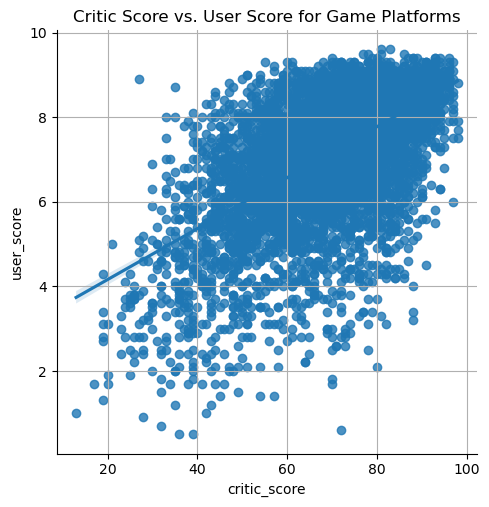

In [24]:
sns.lmplot(x='critic_score', y='user_score', data=valid_scores)
plt.title('Critic Score vs. User Score for Game Platforms')
plt.grid(True);

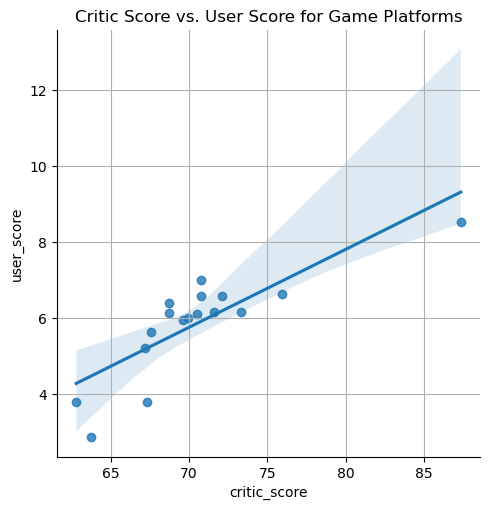

In [25]:
sns.lmplot(x='critic_score', y='user_score', data=grouped_platforms)
plt.title('Critic Score vs. User Score for Game Platforms')
plt.grid(True);

In [26]:
display(valid_scores.head(10))

name platform  year_of_release     genre  na_sales  \
0                  Wii Sports      Wii           2006.0    Sports     41.36   
2              Mario Kart Wii      Wii           2008.0    Racing     15.68   
3           Wii Sports Resort      Wii           2009.0    Sports     15.61   
6       New Super Mario Bros.       DS           2006.0  Platform     11.28   
7                    Wii Play      Wii           2006.0      Misc     13.96   
8   New Super Mario Bros. Wii      Wii           2009.0  Platform     14.44   
11              Mario Kart DS       DS           2005.0    Racing      9.71   
13                    Wii Fit      Wii           2007.0    Sports      8.92   
14         Kinect Adventures!     X360           2010.0      Misc     15.00   
15               Wii Fit Plus      Wii           2009.0    Sports      9.01   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      28.96      3.77         8.45          76.0         8.0      E   
2      12.76      3.79         3.29          82.0         8.3      E   
3      10.93      3.28         2.95          80.0         8.0      E   
6       9.14      6.50         2.88          89.0         8.5      E   
7       9.18      2.93         2.84          58.0         6.6      E   
8       6.94      4.70         2.24          87.0         8.4      E   
11      7.47      4.13         1.90          91.0         8.6      E   
13      8.03      3.60         2.15          80.0         7.7      E   
14      4.89      0.24         1.69          61.0         6.3      E   
15      8.49      2.53         1.77          80.0         7.4      E   

    total_sales  
0         82.54  
2         35.52  
3         32.77  
6         29.80  
7         28.91  
8         28.32  
11        23.21  
13        22.70  
14        21.82  
15        21.80

In [27]:
display(grouped_platforms.head(10))

platform  year_of_release  total_sales  user_score  critic_score
0     2600           1980.0        86.48         NaN           NaN
1      3DO           1994.0         0.10         NaN           NaN
2      3DS           2011.0       257.81    5.207556     67.156627
3       DC           1998.0        15.95    8.528571     87.357143
4       DS           1985.0       802.78    2.862739     63.728814
5       GB           1988.0       254.43         NaN           NaN
6      GBA           2000.0       312.88    3.781925     67.311628
7       GC           2001.0       196.73    5.949234     69.601831
8      GEN           1990.0        28.35         NaN           NaN
9       GG           1992.0         0.04         NaN           NaN

We will get the formulization of lineer regression model. We will create a function accordingly.
- **We will create the function based on 'valid_scores' data.**

In [28]:
X = valid_scores['critic_score'].reset_index(drop=True)
Y = valid_scores['user_score'].reset_index(drop=True)

# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0

for i in range(len(X)):
    num += (X[i] - X_mean) * (Y[i] - Y_mean)
    den += (X[i] - X_mean) ** 2
    
m = num / den
c = Y_mean - m * X_mean

print(m, c)

0.06021269024061373 2.953925287159281


In [29]:
def find_user_score(row):
    x = row['critic_score']
    y = m * x + c
    if y > 0:
        return y

def find_critic_score(row):
    y = row['user_score']
    x = (y - c) / m
    if x > 0:
        return x

We avoided negativity, **the function only returns positive values.** 

We can fill the missing values and 'tbd' values with these functions, **but only the missing values corresponding to valid values.** **Other missing values will be dropped**. Since there is no linear correlation between the 'total_sales' and 'user_score' or 'critic_score', **we can't fill them in accordance with the 'total_sales' values.**

- X: critic_score

- Y: user_score

Now, we will return to our main table, **'games'** table and **filter the '0' and missing values on 'user_score' corresponding to valid values of 'critic_score'.** We will fill them with the help of our functions, then check whether there are any '0' values in this column.

In [30]:
display(games.query('user_score == 0'))

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii           2010.0      Sports   
301    Namco Museum: 50th Anniversary      PS2           2005.0        Misc   
520                   Zumba Fitness 2      Wii           2011.0      Sports   
645                      uDraw Studio      Wii           2010.0        Misc   
718                   Just Dance Kids      Wii           2010.0        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA           2001.0      Action   
16697                Bust-A-Move 3000       GC           2003.0      Puzzle   
16698                Mega Brain Boost       DS           2008.0      Puzzle   
16704                        Plushees       DS           2008.0  Simulation   
16706   Men in Black II: Alien Escape       GC           2003.0     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
119        3.45      2.59       0.0         0.66           NaN         0.0   
301        2.08      1.35       0.0         0.54          61.0         0.0   
520        1.51      1.03       0.0         0.27           NaN         0.0   
645        1.65      0.57       0.0         0.20          71.0         0.0   
718        1.52      0.54       0.0         0.18           NaN         0.0   
...         ...       ...       ...          ...           ...         ...   
16695      0.01      0.00       0.0         0.00          67.0         0.0   
16697      0.01      0.00       0.0         0.00          53.0         0.0   
16698      0.01      0.00       0.0         0.00          48.0         0.0   
16704      0.01      0.00       0.0         0.00           NaN         0.0   
16706      0.01      0.00       0.0         0.00           NaN         0.0   

      rating  total_sales  
119        E         6.70  
301     E10+         3.97  
520        T         2.81  
645        E         2.42  
718        E         2.24  
...      ...          ...  
16695      E         0.01  
16697      E         0.01  
16698      E         0.01  
16704      E         0.01  
16706      T         0.01  

[2377 rows x 12 columns]

In [31]:
games.loc[games['user_score'] == 0, 'user_score'] = games.loc[games['user_score'] == 0].apply(find_user_score, axis=1)
display(games.query('user_score == 0'))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []

In [32]:
games.loc[games['user_score'].isna(), 'user_score'] = (games
                                                       .loc[games['user_score'].isna()].apply(find_user_score, axis=1))


- We have changed the **'tbd' and some 'NaN' values in the 'user_score' column.**

- Now we are going to fill **the missing values in the 'critic_score' depending the 'user_score' column.**

In [33]:
display(games['critic_score'].isna().sum())

8461

In [34]:
games.loc[games['critic_score'].isna(), 'critic_score'] = (games
                                                           .loc[(games['critic_score'].isna())&(games['user_score'].notna())]
                                                           .apply(find_critic_score, axis=1))

In [35]:
display(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7928
user_score         7893
rating             6676
total_sales           0
dtype: int64

- We replaced **'tbd' values in 'user_score' with '0', then converted the column type to float.**

- We found **the correlation between 'user_score' and 'critic_score'**, got the linner regression formulization in accordance with the games data.

- We calculated **user scores for '0' and 'NaN' values with 'find_user_score' function.**

- We calculated **critic scores for 'NaN' values with 'find_critic_score' function.**

We will continue with the analysis of the other parameters.

##### Analysis of the 'games_rating' column

In [36]:
display(games.rating.unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

##### ESRB Ratings

**E**: Everyone /
**M**: Mature /
**T**: Teen /
**E10+**: Everyone 10+ /
**K-A**: Kids-to-Adult /
**AO**: Adults Only /
**EC**: Early Childhood /
**RP**: Rating Pending /




##### Converting the data to the required types

We will convert the year column type **to datetime and year.**

In [37]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = games['year_of_release'].dt.year
display(games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

##### Remaining Missing Values

Let's look at the **distribution of the missing values exist in three columns simultaneosuly to find any relation with years.** Maybe they belong to early years.

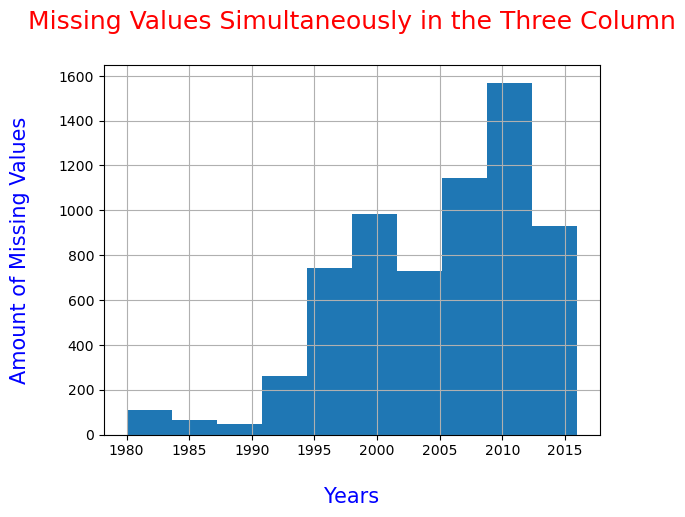

In [38]:
triple_nans = games.loc[(games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]
triple_nans['year_of_release'].hist();
plt.title("Missing Values Simultaneously in the Three Column\n", color='red', size=18)
plt.ylabel("Amount of Missing Values\n", color='blue', size=15)
plt.xlabel("\nYears", color='blue', size=15);

- **They don't belong to old years.** Let's look at **the length of 'triple_nans'.**

In [39]:
display(len(triple_nans))

6580

In [40]:
display(games.groupby('platform')['name'].value_counts())

platform  name                      
2600      Action Force                  1
          Adventures of Tron            1
          Air Raid                      1
          Airlock                       1
          Alien                         1
                                       ..
XOne      XCOM 2                        1
          ZombiU                        1
          Zombie Army Trilogy           1
          Zoo Tycoon (2013)             1
          Zumba Fitness: World Party    1
Name: name, Length: 16441, dtype: int64

In [41]:
display(len(games.name.unique()))

11426

- There are **11.426 unique game names.**

In [42]:
display(len(games.platform.unique()))

31

In [43]:
display(len(games.genre.unique()))

12

##### Describing the columns where the data types have been changed and why

In [44]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8516 non-null   float64
 9   user_score       8551 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


- We converted the type of **'year_of_release'** column **to 'int' after converted datetime.**

- We converted the **'user_score' column's type **from object to float64.**

<a id='2.2.'></a>
## 2.2. Duplicated Values

In [45]:
display(games['name'].duplicated().sum())

5018

- They show us probably the games which are released **on several platforms**. **We will not count them as duplicated.**

In [46]:
display(games.platform.unique())
display(games.genre.unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

* We will separate the dataset into two parts. One is **'games_scores'**, we will **keep the columns with the missing values** in this table. The other is **our main dataset, 'games'**, we will **drop the columns which contain the missing values.**

In [47]:
games_scores = games.copy()
display(games_scores.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [48]:
games.dropna(axis='columns', inplace=True)
display(games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  total_sales  
0     28.96      3.77         8.45        82.54  
1      3.58      6.81         0.77        40.24  
2     12.76      3.79         3.29        35.52  
3     10.93      3.28         2.95        32.77  
4      8.89     10.22         1.00        31.38

In [49]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [50]:
games_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8516 non-null   float64
 9   user_score       8551 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


- **We dropped the columns which have got missing values in 'games' table and kept the columns in 'games_score' table.**

<a id='2.3.'></a>
## 2.3. Outliers

- We will look at the distribution of the games' sales** for just to get the information about sales. Game sales and turnovers can vary greatly depending on many variables, therefore, **maybe it will not be correct to set an upper or lower limit for game sales.**

In [51]:
import plotly.express as px
fig = px.histogram(games_scores, x="na_sales", title="North America Sales Distribution")
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

- **Since there are many them missing values in our dataset, the sales are cumulatively on the left.** 
- Let's plot them **without missing values and with updating x-axis ranges** to see clearly the distribution.

In [52]:
dropped_games = games_scores[games_scores.notna().all(axis=1)]

In [53]:
fig = px.histogram(dropped_games, x="na_sales", title="North America Sales Distribution")
fig.update_layout(xaxis_range=[0,5])
fig.show()

In [54]:
fig = px.histogram(dropped_games, x="eu_sales", title="European Union Sales Distribution")
fig.update_layout(xaxis_range=[0,2])
fig.show()

In [55]:
fig = px.histogram(dropped_games, x="jp_sales", title="Japan Sales Distribution")
fig.update_layout(xaxis_range=[0,0.5])
fig.show()

In [56]:
fig = px.histogram(dropped_games, x="other_sales", title="Sales Distribution of Other Regions")
fig.update_layout(xaxis_range=[0,0.5])
fig.show()

In [57]:
fig = px.histogram(dropped_games, x="total_sales", title="Global Sales Distribution")
fig.update_layout(xaxis_range=[0,5])
fig.show()

- Let's look at **the best selling games with over 20 million $.** 

In [58]:
fig = px.histogram(games_scores.query('total_sales > 20'), x="total_sales", title="North America Sales Distribution over $20 million")
fig.show()

In [59]:
display(games_scores.query('total_sales > 20').sort_values(by='total_sales', ascending=False))

name platform  year_of_release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
5                                         Tetris       GB             1989   
6                          New Super Mario Bros.       DS             2006   
7                                       Wii Play      Wii             2006   
8                      New Super Mario Bros. Wii      Wii             2009   
9                                      Duck Hunt      NES             1984   
10                                    Nintendogs       DS             2005   
11                                 Mario Kart DS       DS             2005   
12                   Pokemon Gold/Pokemon Silver       GB             1999   
13                                       Wii Fit      Wii             2007   
14                            Kinect Adventures!     X360             2010   
15                                  Wii Fit Plus      Wii             2009   
16                            Grand Theft Auto V      PS3             2013   
17                 Grand Theft Auto: San Andreas      PS2             2004   
18                             Super Mario World     SNES             1990   
19  Brain Age: Train Your Brain in Minutes a Day       DS             2005   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

    user_score rating  total_sales  
0          8.0      E        82.54  
1          NaN    NaN        40.24  
2          8.3      E        35.52  
3          8.0      E        32.77  
4          NaN    NaN        31.38  
5          NaN    NaN        30.26  
6          8.5      E        29.80  
7          6.6      E        28.91  
8          8.4      E        28.32  
9          NaN    NaN        28.31  
10         NaN    NaN        24.67  
11         8.6      E        23.21  
12         NaN    NaN        23.09  
13         7.7      E        22.70  
14         6.3      E        21.82  
15         7.4      E        21.80  
16         8.2      M        21.05  
17         9.0      M        20.81  
18         NaN    NaN        20.62  
19         7.9      E        20.14

- **We did not identify any outliers.**
- **NA** has **the biggest sales**. **After that EU comes**. 
- For all graphs, most of the games' costs are **near to '0'**. They have **positive skewness**, because the sales show **million dollars**, and when we see the **0.01 in the table, it means 10.000 dollars**. It's **highly possible that a game sales below 10.000 dollars**, **so it's normal that the distributions are skewed positively near to '0'.**

 <a id='2.4.'></a>
## 2.4. Step Conclusion

- We replaced the column names with **lowercase.**

- We converted the type of the **'Year_of_Release' column to datetime.**

- We converted the type of '**user_score' to float after replacing 'tbd' values with '0'.**

- We analyzed the missing values.

- We **dropped the missing values in the 'year_of_release', 'name', and 'genre'** columns, because their percentages were very few.

- We had too many missing values in the 'critic_score', 'user_score', and 'rating' columns, they were about 50% of the dataset. We seperated our main table into two tables. We kept the majority missing values in the other dataset named 'games_scores', and dropped them for 'games' dataset. 

- We separated **our dataset into two parts.** One is **'games'**. We **dropped the columns of 'games' table which have missing values**, and it shows us **only the sales information**, not scoring and rating values. The other table is **'games_scores'** and we **will drop the missing values for them in the next steps after filling some missing and 'tbd' values in the 'critic_score' and 'user_score'.**

- We found the linear correlation between **'user_score' and 'critic_score' (0.58)**, got the linear regression formulization in accordance with the games data. 

- We replaced **'tbd'** values in **'user_score' with '0'**, then convert the column type **to float**. 

- We calculated **user scores** for **'0' and 'NaN'** values with **'find_user_score' function. **

- We calculated **critic scores** for **'NaN'** values with **'find_critic_score' function.**

- We didn't find any significant correlation between 'total_sales' and 'user_score' or 'critic_score'.

- We looked at the distribution of the games' sales for just to get the information about sales. **We didn't define any outliers.**

<a id='Step3'></a>
# Step 3. Analyze the data

- We will analyze the tables to answer some questions.

<a id='3.1.'></a>
## 3.1.  Answer for Questions

<a id='3.1.1.'></a>
### 3.1.1. Looking at how many games were released in different years

- We will **group the name of games by the year of release** to find **the counts of games per year**. We will use the **'games'** table.

In [60]:
display(games.groupby(['year_of_release'])['name'].count().sort_values(ascending=False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

In [61]:
games_by_years = games[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
display(games_by_years)

year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   502

- Let's look at the **density distribution of the games in years**.

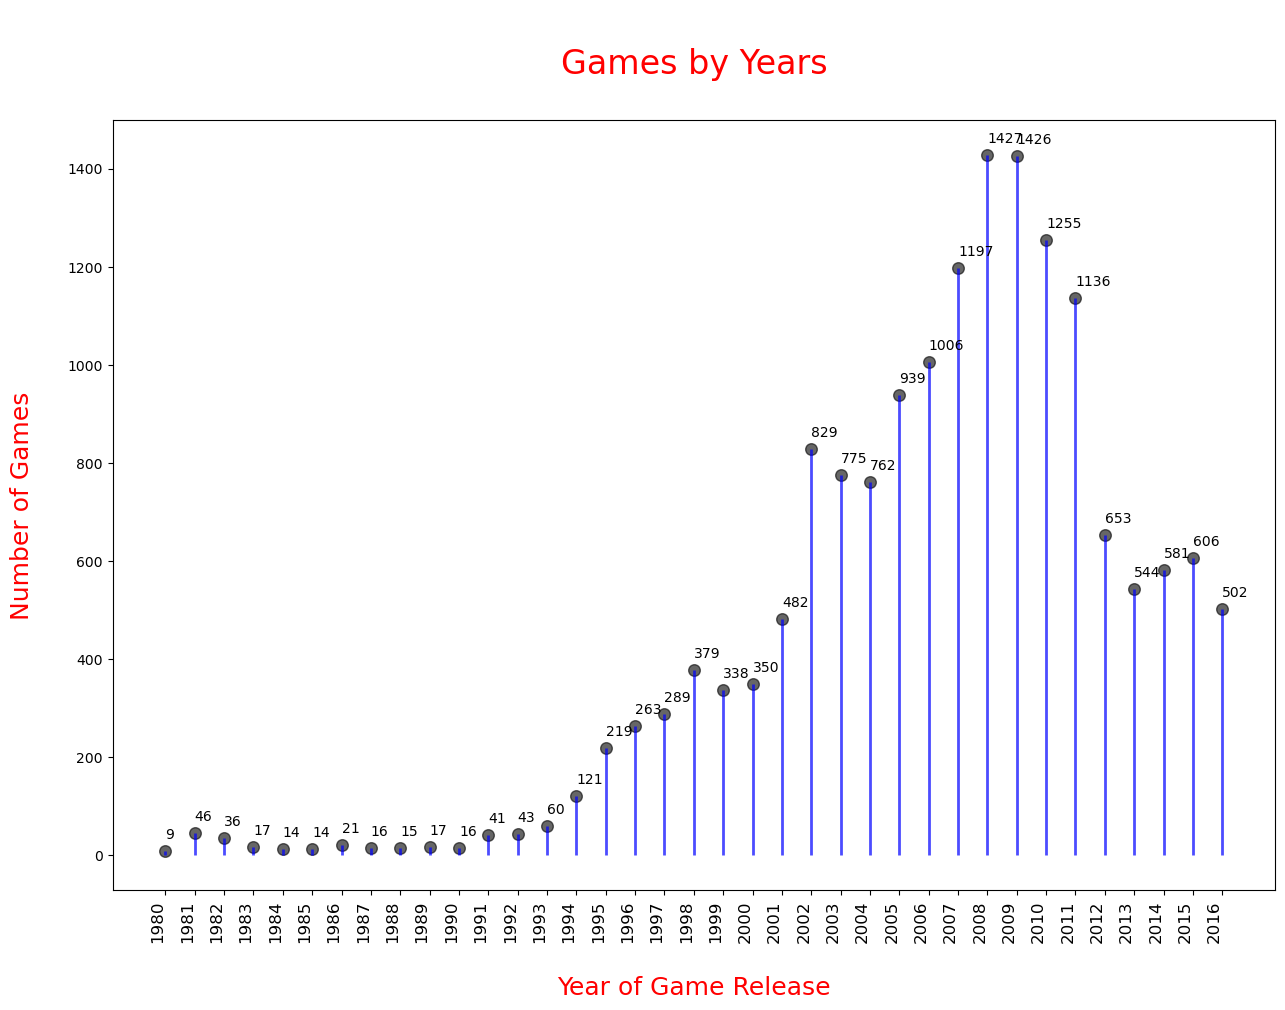

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.vlines(x=games_by_years['year_of_release'], ymin=0, ymax=games_by_years['name'], color='blue', alpha=.7, linewidth=2)
ax.scatter(x=games_by_years['year_of_release'], y=games_by_years['name'], s=70, color='black', alpha=.6)


ax.set_title('\nGames by Years\n', size=24, color='red')
ax.set_ylabel('Number of Games\n', size=18, color='red')
ax.set_xlabel('\nYear of Game Release', size=18, color='red');
ax.set_xticks(games_by_years['year_of_release'])
ax.set_xticklabels(games_by_years['year_of_release'],rotation=90, fontdict={'horizontalalignment':'right', 'size':12})

for row in games_by_years.itertuples():
    ax.text(row.year_of_release, row.name+25, s=round(row.name, 2));

- We had found the earliest year as 1980, and the last year was 2016.

- According to this graph, **the games production began to increase in 90s and again it increased in the 2000s more than before. After 2010, the game sales decreased.**

- With the emergence and popularization of the internet in the 90s, the game market has grown rapidly towards the 2000s. With the emergence of many new game platforms of brands in the 2000s, game production continued to increase. 

- There is a decline after 2010, **the reasons for this may be the failure of some game platforms to hold on to the market, the disappearance of old game platforms or the missing data of the dataset in recent years.**

- It's important for us to analyze the data belongs to the last years. We will analyze in the next steps.

<a id='3.1.2.'></a>
### 3.1.2. Looking at how sales varied from platform to platform. Choosing the platforms with the greatest total sales and building a distribution based on data for each year. Finding platforms that used to be popular but now have zero sales.

- We will **group the games table by platforms** and use **the agg function to see the sum of the total sales of platforms in descending order.**

In [63]:
display((games
         .groupby('platform', as_index=False)
         .agg({'total_sales':'sum'})
         .sort_values(by='total_sales', ascending=False)))

platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       289.53
2       3DS       257.81
13       PC       255.76
5        GB       254.43
29       XB       251.57
11      NES       251.05
10      N64       218.01
23     SNES       200.04
7        GC       196.73
30     XOne       159.32
0      2600        86.48
27     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03

- Let's take **the first 6 platforms**. Their total sales are **above 700**, **atleast 2 times more than the highest competitors**. 
- We'll name it **'popular_platforms'**.

In [64]:
popular_platforms = list((games
                          .groupby('platform', as_index=False)
                          .agg({'total_sales':'sum'})
                          .sort_values(by='total_sales', ascending=False)[0:6]['platform']))
display(popular_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

- Now we will look at all columns of our *popular platforms*, then we will get the **pivot table** to plot the graph to see the **sales of the platforms** in years. 

In [65]:
display(games.query('platform in @popular_platforms').head())

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  total_sales  
0     28.96      3.77         8.45        82.54  
2     12.76      3.79         3.29        35.52  
3     10.93      3.28         2.95        32.77  
6      9.14      6.50         2.88        29.80  
7      9.18      2.93         2.84        28.91

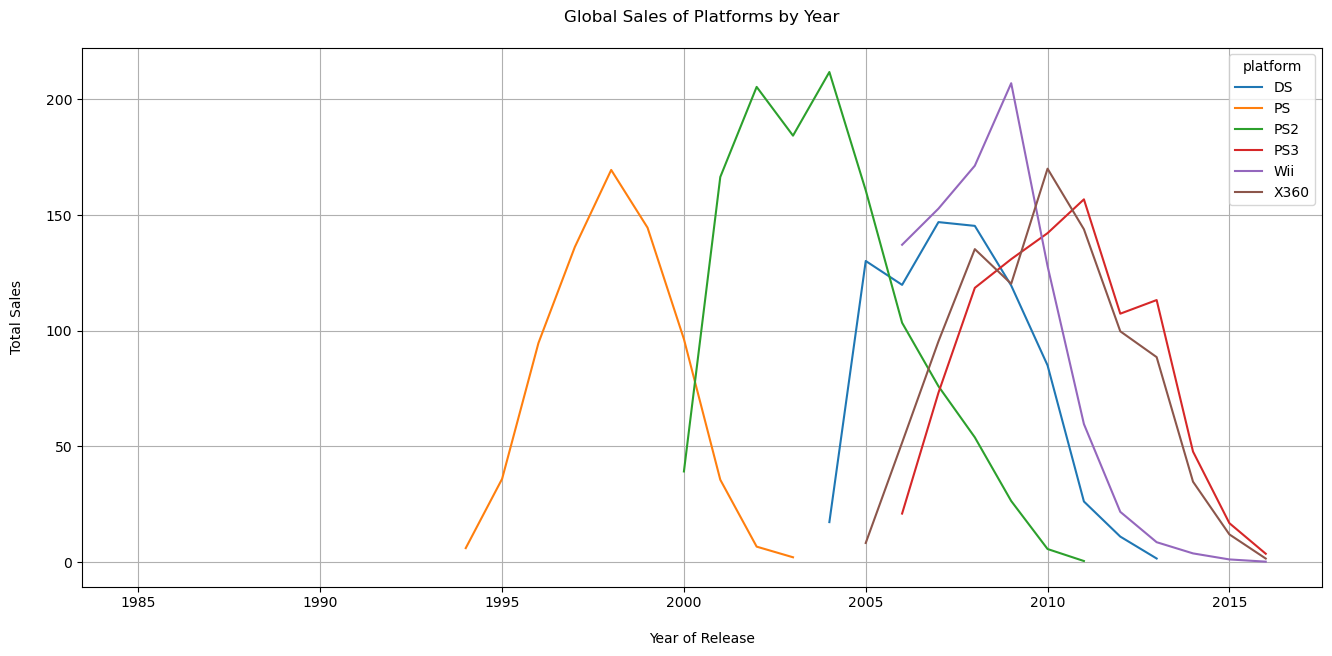

In [66]:
(games
 .query('platform in @popular_platforms')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(16, 7)))

plt.gca().set(title='Global Sales of Platforms by Year\n', ylabel='Total Sales\n', xlabel='\nYear of Release');

- **PS, PS2 and DS** platform's global sales used to be popular, **but now their sales are zero.**

- It takes generally **about 4-5 years for new platforms to appear and 4-5 years for old ones to fade.** *The average lifetime of the popular platforms is **between 8-10 years**.*

<a id='3.1.3.'></a>
### 3.1.3. Determining what period we should take data for. 

- According to the previous results, we need to define **the limit year** for data. 
- Average lifetime is **10 years** for a platform. **But we can see the rapid changes and decreases in 4-5 years.** So we will take the **last 3 years to analyze.**

<a id='3.1.4.'></a>
### 3.1.4. Working only with the data that we've decided is relevant. We will disregard the data for previous years.

- We will analyze **after 2013**. 
- We will store them **'games_last_years'** variable in.

In [67]:
games_last_years = games.query('year_of_release > 2013')

<a id='3.1.5.'></a>
### 3.1.5. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

- Let's look at the **total sales of platforms** for last years. 
- After that we will get **the leading and fading platforms** for last years.

In [68]:
display((games_last_years
         .groupby('platform', as_index=False)
         .agg({'total_sales':'sum'})
         .sort_values(by='total_sales', ascending=False)))

platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22
7     WiiU        42.98
1       PC        27.05
5      PSV        22.40
6      Wii         5.07
4      PSP         0.36

In [69]:
last_leading_platforms = (games_last_years
                            .groupby('platform', as_index=False)
                            .agg({'total_sales':'sum'})
                            .sort_values(by='total_sales', ascending=False)[0:3])

display(last_leading_platforms)

platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68

- **PS4, XOne and 3DS are leading in sales for the last years**, *although PS2 has the biggest global sales for all times* in according to our previous popular platforms result. 
- We saw that PS2 has peak sales before 2005, and it was before an average lifetime. Also there were new PS platforms popularyear by year, so it is understandable that PS2 is not included in our top list for last years.

In [70]:
pivot_last_years = (games_last_years
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

pivot_last_years.fillna(0, inplace=True)

display(pivot_last_years)

platform           3DS     PC    PS3     PS4   PSP    PSV   Wii   WiiU   X360  \
year_of_release                                                                 
2014             43.76  13.28  47.76  100.00  0.24  11.90  3.75  22.03  34.74   
2015             27.78   8.52  16.82  118.90  0.12   6.25  1.14  16.35  11.96   
2016             15.14   5.25   3.60   69.25  0.00   4.25  0.18   4.60   1.52   

platform          XOne  
year_of_release         
2014             54.07  
2015             60.14  
2016             26.15

- Let's look at **the average global sales of platforms** for last years **to find leading and shrinking platforms**.

<a id='PlatformSalesGraph'></a>

C:\Users\alper\AppData\Local\Temp\ipykernel_11940\3093098941.py:3: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



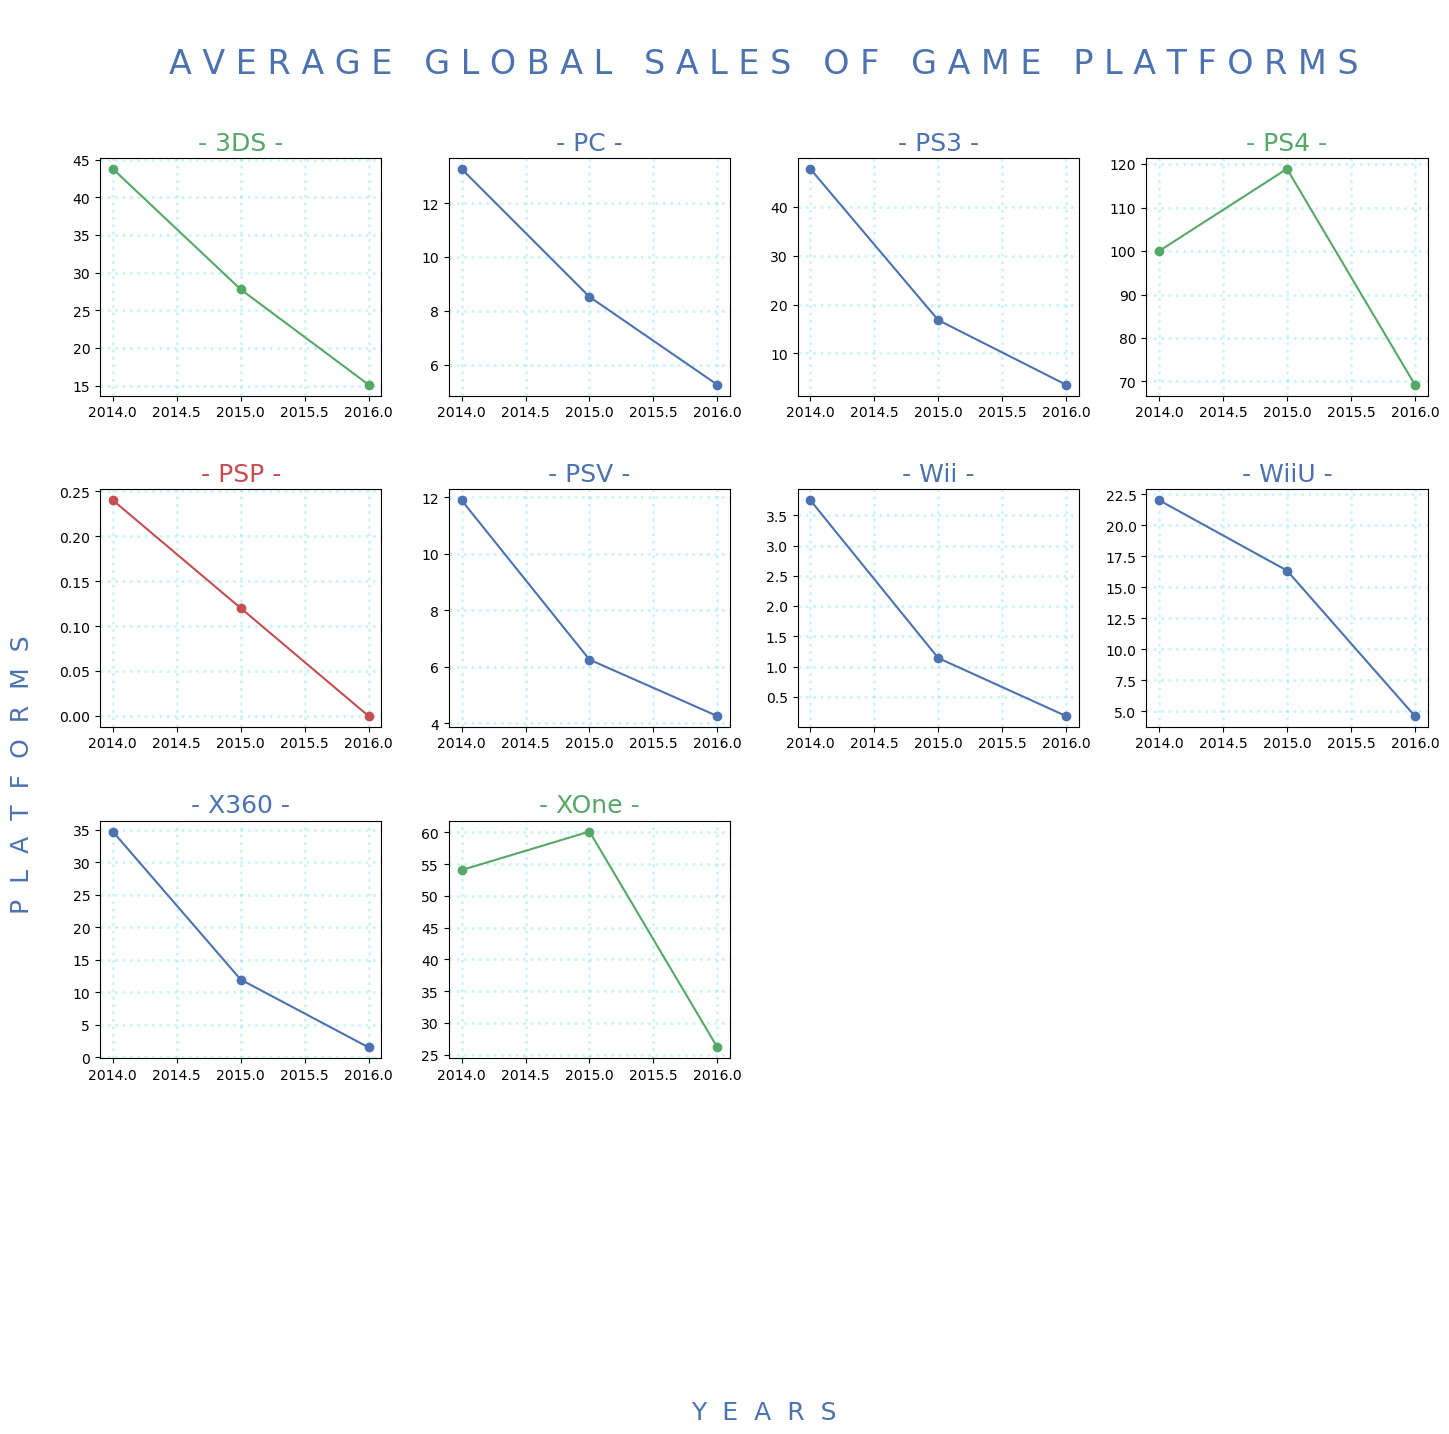

In [71]:
fig = plt.figure(figsize=(15, 15))

plt.gca(frameon=False, xticks=[], yticks=[])

sns.set_color_codes()

plt.title('\nA V E R A G E   G L O B A L   S A L E S   O F   G A M E   P L A T F O R M S\n\n', color='b', size=24)
plt.xlabel("Y  E  A  R  S", color='b', size=18)
plt.ylabel("P  L  A  T  F  O  R  M  S\n\n", color='b', size=18)
plt.style.use('seaborn-pastel')

last_year = pivot_last_years.loc[2016]

for col in range(len(pivot_last_years.columns)):
    fig.add_subplot(4, 4, col+1)
    
    (pivot_last_years.iloc[:, col].plot(marker = "o", 
                                          color = 'r' if last_year[col]==0 else 'g' if last_year[col]>=10 else 'b'))
    plt.xlabel("")
    plt.ylabel("")
    (plt.title("\n- {} -".format(pivot_last_years.columns[col]), size=18, 
               color='r' if last_year[col]==0 else 'g' if last_year[col]>=10 else 'b'))
    plt.grid(color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
    plt.tight_layout()

plt.show();

- Color description:

    - **RED GRAPHS**  : No sales in 2016

    - **GREEN GRAPHS** : Still have sales and bigger than '10' mil. dollars in 2016

    - **BLUE GRAPHS** : Still have sales and smaller than '10' mil. dollars in 2016

- According to the global sales graphics of 16 game platforms in the last ten years;

    - PSP now have zero sales,

    - All other platforms are shrinking, some of them are close to zero (X360, Wii),

    - Many of them have still big sales

- **The most profitable platforms are PS4 (70), XOne (30), and 3DS (15).**

<a id='3.1.6.'></a>
### 3.1.6. Building a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describing our findings.

- We will draw a boxplot for all games.

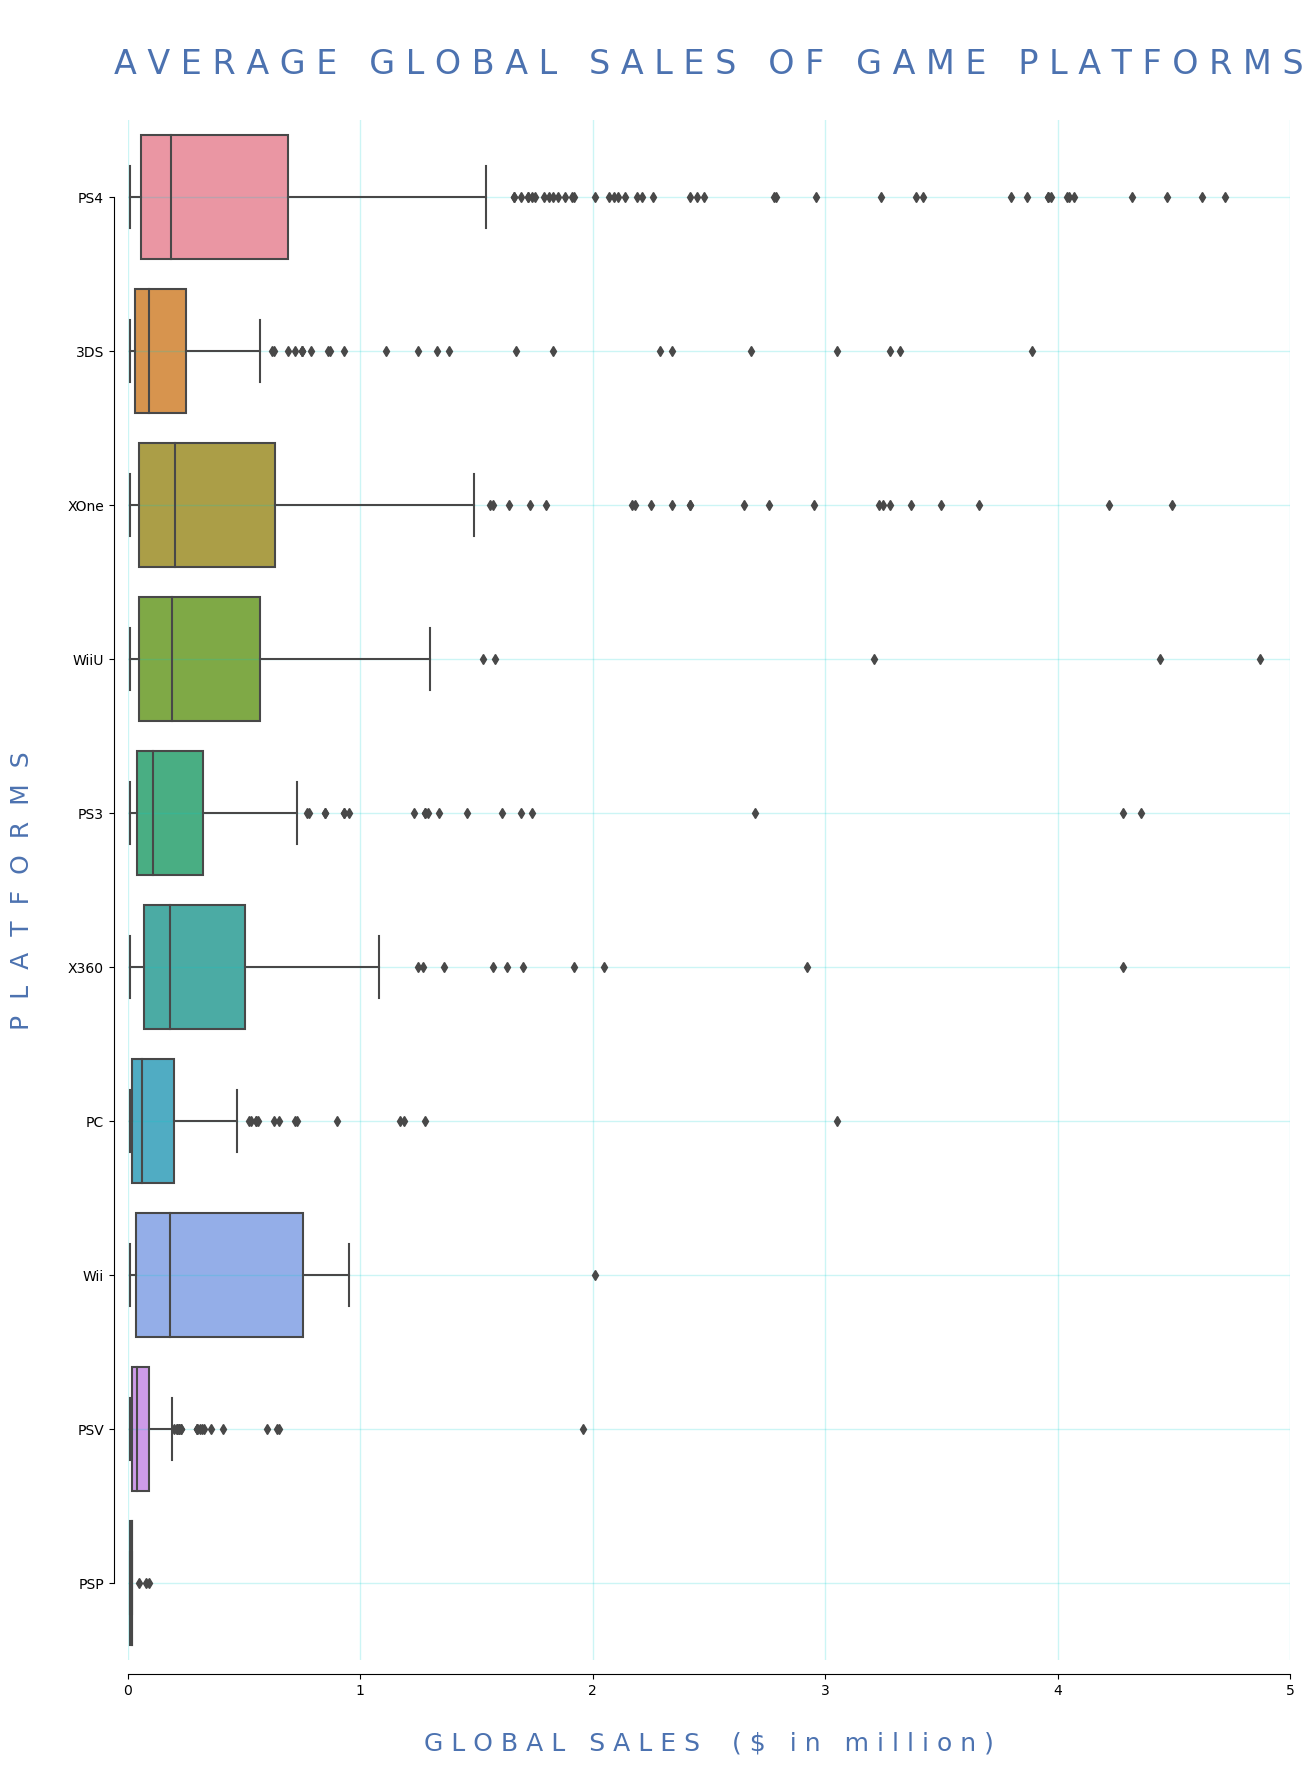

In [72]:
f, ax = plt.subplots(figsize=(15, 20))
ax.set_xlim(0, 5)

sns.boxplot(x="total_sales", y="platform", data=games_last_years);
sns.despine(offset=10, trim=True)
plt.xlabel("\nG L O B A L   S A L E S    ( $   i n   m i l l i o n )", color='b', size=18)
plt.ylabel("P  L  A  T  F  O  R  M  S\n", color='b', size=18)
plt.title('\nA V E R A G E   G L O B A L   S A L E S   O F   G A M E   P L A T F O R M S\n', color='b', size=24)
plt.grid(color='DarkTurquoise', alpha=0.2, linestyle='-', linewidth=1)

In [73]:
platforms_total_sales = (games_last_years.groupby('platform', as_index=False)
                          .agg({'total_sales':'sum'})
                          .sort_values(by='total_sales', ascending=False))
display(platforms_total_sales.T)

3       9      0      2      8      7      1     5     6  \
platform        PS4    XOne    3DS    PS3   X360   WiiU     PC   PSV   Wii   
total_sales  288.15  140.36  86.68  68.18  48.22  42.98  27.05  22.4  5.07   

                4  
platform      PSP  
total_sales  0.36

In [74]:
platforms_average_sales = (games_last_years.groupby('platform', as_index=False)
                           .agg({'total_sales':'mean'})
                           .sort_values(by='total_sales', ascending=False))
display(platforms_average_sales.T)

3         9         7         6         8         0  \
platform          PS4      XOne      WiiU       Wii      X360       3DS   
total_sales  0.766356  0.615614  0.588767  0.460909  0.434414  0.408868   

                    2         1         5         4  
platform          PS3        PC       PSV       PSP  
total_sales  0.311324  0.179139  0.075932  0.027692

In [75]:
platforms_game_counts = (games_last_years.groupby('platform', as_index=False)
                         .agg({'total_sales':'count'})
                         .sort_values(by='total_sales', ascending=False))
display(platforms_game_counts.T)

3    5     9    2    0    1     8     7    4    6
platform     PS4  PSV  XOne  PS3  3DS   PC  X360  WiiU  PSP  Wii
total_sales  376  295   228  219  212  151   111    73   13   11

In [76]:
display(games.query('platform in ["GB", "NES", "GEN"]').describe())

year_of_release    na_sales    eu_sales    jp_sales  other_sales  \
count       222.000000  222.000000  222.000000  222.000000   222.000000   
mean       1991.716216    1.165991    0.334144    0.839820     0.064685   
std           5.337955    3.388832    0.912518    1.162122     0.173583   
min        1983.000000    0.000000    0.000000    0.000000     0.000000   
25%        1987.000000    0.000000    0.000000    0.212500     0.000000   
50%        1991.000000    0.285000    0.065000    0.435000     0.010000   
75%        1996.000000    0.927500    0.310000    1.097500     0.050000   
max        2001.000000   29.080000    8.890000   10.220000     1.510000   

       total_sales  
count    222.00000  
mean       2.40464  
std        4.95919  
min        0.03000  
25%        0.39250  
50%        1.22000  
75%        2.16500  
max       40.24000

- **PS2, X360, and PS3 have biggest total global sales, while GB, NES and GEN have biggest average sales for all time.** The reason of that is *the difference in the game amount produced by the platforms*. **PS2, DS, and PS3 have more games than other platforms.**

- And also GB, NES and GEN were old platforms and existed since 1983 to 2001 years. At the time, there could be many reasons for that but **probably the price of a game was more expensive.**

<a id='3.1.7.'></a>
### 3.1.7. Taking a look at how user and professional reviews affect sales for one popular platform. Building a scatter plot and calculating the correlation between reviews and sales.

- We will use **'games_score'** table from now. Let's look at the table.

In [77]:
display(games_scores.sample(10))

name platform  year_of_release  \
10018                           Dokapon Kingdom      PS2             2007   
11835                  America's Next Top Model      Wii             2010   
8504               Let's Ride: Sunshine Stables      GBA             2005   
4784   The Chronicles of Narnia: Prince Caspian      PS2             2008   
13884                      SWAT: Target Liberty      PSP             2007   
14853                    My Frogger: Toy Trials       DS             2006   
12832                Tom Clancy's Rainbow Six 3       GC             2004   
2760                              [Prototype 2]      PS3             2012   
2898                    Tony Hawk's Underground       GC             2003   
3873                                 SimAnimals       DS             2009   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
10018  Role-Playing      0.05      0.04      0.02         0.01          61.0   
11835        Action      0.07      0.00      0.00         0.00           NaN   
8504         Sports      0.12      0.04      0.00         0.00           NaN   
4784         Action      0.20      0.15      0.00         0.05          67.0   
13884       Shooter      0.03      0.00      0.00         0.00          50.0   
14853        Action      0.02      0.00      0.00         0.00          66.0   
12832       Shooter      0.04      0.01      0.00         0.00          68.0   
2760         Action      0.36      0.28      0.00         0.10          79.0   
2898         Sports      0.54      0.14      0.00         0.02          89.0   
3873     Simulation      0.26      0.20      0.00         0.05          70.0   

       user_score rating  total_sales  
10018    6.500000   E10+         0.12  
11835         NaN   E10+         0.07  
8504          NaN    NaN         0.16  
4784     7.000000      T         0.40  
13884    7.700000      T         0.03  
14853    6.927963      E         0.02  
12832    8.200000      M         0.05  
2760     6.800000      M         0.74  
2898     8.500000      T         0.70  
3873     7.500000      E         0.51

- We will **drop the rows with missing values**. Then we will look **the count of our leading platforms for last ten years**. We will choose one of them.

In [78]:
games_scores.dropna(subset=['critic_score', 'user_score'], inplace=True)
games_scores = games_scores.reset_index(drop=True)
display(games_scores.head())

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
1         Mario Kart Wii      Wii             2008    Racing     15.68   
2      Wii Sports Resort      Wii             2009    Sports     15.61   
3  New Super Mario Bros.       DS             2006  Platform     11.28   
4               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1     12.76      3.79         3.29          82.0         8.3      E   
2     10.93      3.28         2.95          80.0         8.0      E   
3      9.14      6.50         2.88          89.0         8.5      E   
4      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
1        35.52  
2        32.77  
3        29.80  
4        28.91

In [79]:
display(len(games_scores.query('platform == "3DS"')))
display(len(games_scores.query('platform == "XONE"')))
display(len(games_scores.query('platform == "PS4"')))

180

0

260

- We will choose **"PS4"** platform because **it has more data and bigger sales than others in our still trending and popular platforms.**

In [80]:
games_ps4 = games_scores.query('platform == "PS4"').reset_index(drop=True)

- Let's look at the scatter plots to view the correlation of review and sales.

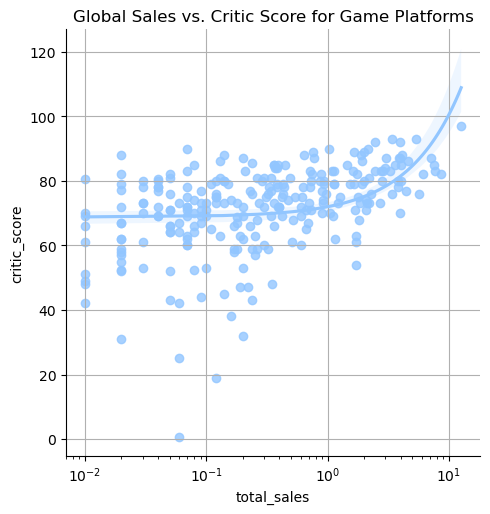

In [81]:
sns.lmplot(x='total_sales', y='critic_score', data=games_ps4)
plt.title('Global Sales vs. Critic Score for Game Platforms')
plt.xscale('log')
plt.grid(True);

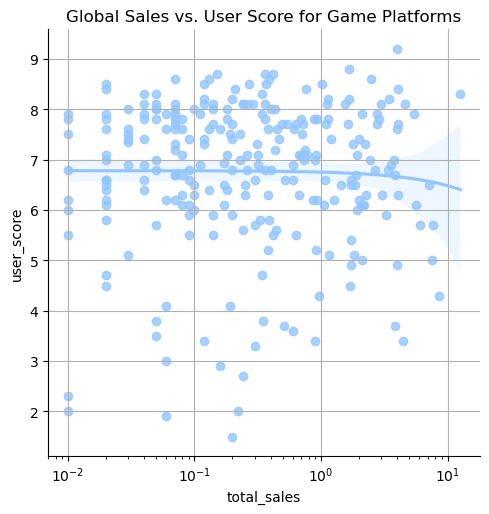

In [82]:
sns.lmplot(x='total_sales', y='user_score', data=games_ps4)
plt.title('Global Sales vs. User Score for Game Platforms')
plt.xscale('log')
plt.grid(True);

In [83]:
display(games_ps4.corr())

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.271160 -0.200334 -0.134065    -0.242167   
na_sales               -0.271160  1.000000  0.717889  0.535494     0.916356   
eu_sales               -0.200334  0.717889  1.000000  0.524299     0.935669   
jp_sales               -0.134065  0.535494  0.524299  1.000000     0.571367   
other_sales            -0.242167  0.916356  0.935669  0.571367     1.000000   
critic_score           -0.020453  0.397161  0.331743  0.310263     0.391187   
user_score              0.153996 -0.022390 -0.050133  0.169801    -0.037032   
total_sales            -0.244323  0.895139  0.952022  0.596584     0.997822   

                 critic_score  user_score  total_sales  
year_of_release     -0.020453    0.153996    -0.244323  
na_sales             0.397161   -0.022390     0.895139  
eu_sales             0.331743   -0.050133     0.952022  
jp_sales             0.310263    0.169801     0.596584  
other_sales          0.391187   -0.037032     0.997822  
critic_score         1.000000    0.574420     0.388847  
user_score           0.574420    1.000000    -0.033381  
total_sales          0.388847   -0.033381     1.000000

In [84]:
display(np.log(games_ps4['total_sales']).corr(games_ps4['critic_score']))

0.4574753168582567

- There is weak correlation between sales and critic_scores.

    - (**0.40 for global and other regions; 0.34 for EU; 0.32 for JP**)
    - It's risen **to 0.45 with np.log for total sales and critic scores.**
 


- There is no correlation between sales and user_scores.

    - (close to '0' for all regions)

<a id='3.1.8.'></a>
### 3.1.8. Comparing the sales of the same games on other platforms.

- We will **filter the same game names of PS4 platform** for other platforms. 
- Then we will **group the data by 'platform', 'name', and 'year_of_release'** to see them on the index. 
- We will apply the **agg function with the mean values of the sales and scores**. 
- At the last we will **sort in descending order**.

In [85]:
display(games_scores.head())

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
1         Mario Kart Wii      Wii             2008    Racing     15.68   
2      Wii Sports Resort      Wii             2009    Sports     15.61   
3  New Super Mario Bros.       DS             2006  Platform     11.28   
4               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1     12.76      3.79         3.29          82.0         8.3      E   
2     10.93      3.28         2.95          80.0         8.0      E   
3      9.14      6.50         2.88          89.0         8.5      E   
4      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
1        35.52  
2        32.77  
3        29.80  
4        28.91

In [86]:
platforms_ps4_games = (games_scores
                        .query('name in @games_ps4.name and platform != "PS4"')
                        .groupby(['platform', 'name', 'year_of_release'], as_index=False)
                        .agg({'na_sales':'mean', 'eu_sales':'mean', 'jp_sales':'mean', 'other_sales':'mean',
                              'total_sales':'mean', 'critic_score':'mean', 'user_score':'mean'})
                        .sort_values(by=['platform', 'total_sales'], ascending=False)
                        .reset_index(drop=True)
                       )
display(platforms_ps4_games)
display(platforms_ps4_games.platform.unique())

platform                                         name  year_of_release  \
0       XOne                           Grand Theft Auto V             2014   
1       XOne               Call of Duty: Advanced Warfare             2014   
2       XOne                                    Fallout 4             2015   
3       XOne                      Assassin's Creed: Unity             2014   
4       XOne                                      Destiny             2014   
..       ...                                          ...              ...   
465      3DS                       LEGO Marvel's Avengers             2016   
466      3DS                                Shovel Knight             2015   
467      3DS            Lego Star Wars: The Force Awakens             2016   
468      3DS                                     Terraria             2016   
469      3DS  The Peanuts Movie: Snoopy's Grand Adventure             2015   

     na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
0        2.81      2.19      0.00         0.47         5.47     97.000000   
1        3.22      1.55      0.01         0.48         5.26     81.000000   
2        2.51      1.32      0.01         0.38         4.22     88.000000   
3        2.27      0.90      0.00         0.33         3.50     72.000000   
4        2.14      0.92      0.00         0.31         3.37     75.000000   
..        ...       ...       ...          ...          ...           ...   
465      0.07      0.09      0.01         0.01         0.18     60.000000   
466      0.08      0.04      0.02         0.01         0.15     90.000000   
467      0.04      0.07      0.01         0.01         0.13     80.482614   
468      0.00      0.04      0.05         0.00         0.09     71.000000   
469      0.00      0.03      0.00         0.00         0.03     97.090409   

     user_score  
0           7.9  
1           5.4  
2           6.2  
3           4.1  
4           5.5  
..          ...  
465         7.1  
466         8.2  
467         7.8  
468         7.1  
469         8.8  

[470 rows x 10 columns]

array(['XOne', 'X360', 'WiiU', 'Wii', 'PSV', 'PSP', 'PS3', 'PC', 'DS',
       '3DS'], dtype=object)

- We will loop to find the correlation for all platforms.

In [87]:
for platform in platforms_ps4_games.platform.unique():
    result = (platforms_ps4_games.loc[platforms_ps4_games.platform == platform]
              .corr().loc['total_sales', 'critic_score':'user_score']
             )
    print("{} total sales correlations with:\n{}\n".format(platform, result))

XOne total sales correlations with:
critic_score    0.374700
user_score     -0.150459
Name: total_sales, dtype: float64

X360 total sales correlations with:
critic_score    0.208919
user_score     -0.124787
Name: total_sales, dtype: float64

WiiU total sales correlations with:
critic_score    0.388620
user_score      0.172587
Name: total_sales, dtype: float64

Wii total sales correlations with:
critic_score    0.389347
user_score      0.700313
Name: total_sales, dtype: float64

PSV total sales correlations with:
critic_score   -0.474375
user_score     -0.533533
Name: total_sales, dtype: float64

PSP total sales correlations with:
critic_score   -1.0
user_score     -1.0
Name: total_sales, dtype: float64

PS3 total sales correlations with:
critic_score    0.167503
user_score     -0.059272
Name: total_sales, dtype: float64

PC total sales correlations with:
critic_score    0.335843
user_score      0.022102
Name: total_sales, dtype: float64

DS total sales correlations with:
critic_score  

- **Wii platform has the highest correlation values**. 
- There is a **strong linear relation** between **total sales and user score (0.70) for Wii platform**. 
- The other platforms have no meaningful correlation.

<a id='3.1.9.'></a>
### 3.1.9. Taking a look at the general distribution of games by genre. What can we say about the most profitable genres? Can we generalize about genres with high and low sales?

- Now we will **group games by genre.**

In [88]:
genre_games = (games_scores
               .groupby(['genre', 'platform', 'name'], as_index=False)
               .agg({'na_sales':'mean', 'eu_sales':'mean', 'jp_sales':'mean', 'other_sales':'mean',
                     'total_sales':'mean', 'critic_score':'mean', 'user_score':'mean'})
               .sort_values(by=['genre', 'total_sales'], ascending=False)
               .reset_index(drop=True)
              )

display(genre_games)

genre platform                            name  na_sales  eu_sales  \
0     Strategy       PC  StarCraft II: Wings of Liberty      2.57      1.68   
1     Strategy     X360                       Halo Wars      1.54      0.80   
2     Strategy       PC                  Theme Hospital      2.30      0.10   
3     Strategy       PC                  Sim Theme Park      2.04      0.04   
4     Strategy       PC      Sid Meier's Civilization V      0.98      0.52   
...        ...      ...                             ...       ...       ...   
8508    Action     XOne                Prison Architect      0.01      0.00   
8509    Action     XOne     Prototype: Biohazard Bundle      0.01      0.00   
8510    Action     XOne             Rugby League Live 3      0.00      0.01   
8511    Action     XOne     Saints Row: Gat out of Hell      0.00      0.01   
8512    Action     XOne                      Worms: WMD      0.01      0.00   

      jp_sales  other_sales  total_sales  critic_score  user_score  
0         0.00         0.58         4.83     93.000000         8.2  
1         0.04         0.24         2.62     82.000000         7.2  
2         0.00         0.00         2.40    100.411968         9.0  
3         0.00         0.00         2.08     88.786511         8.3  
4         0.00         0.17         1.67     90.000000         7.9  
...        ...          ...          ...           ...         ...  
8508      0.00         0.00         0.01     74.000000         6.7  
8509      0.00         0.00         0.01     56.000000         3.1  
8510      0.00         0.00         0.01     68.857158         7.1  
8511      0.00         0.00         0.01     65.000000         6.0  
8512      0.00         0.00         0.01     75.000000         8.1  

[8513 rows x 10 columns]

- Let's plot a horizontal bar to show the amounts of genres.

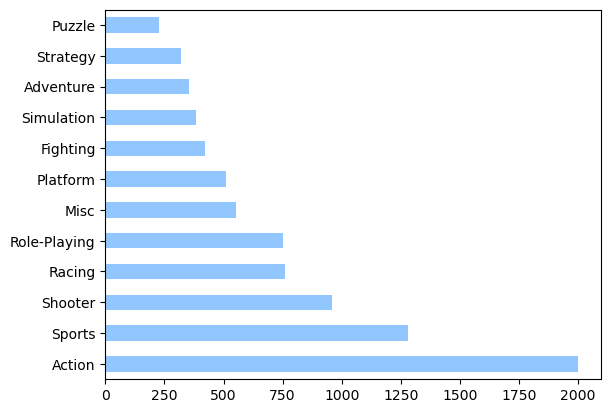

In [89]:
genre_games.genre.value_counts().plot.barh();

- There are mostly **'Action'** games in the table. **'Sports'** and **'Shooter'** are **the second and third genres**.

- Now we will **group games by genre with agg function to agg total sales and reviews with mean values.**

In [90]:
grouped_genres = (genre_games
                  .groupby('genre', as_index=False)
                  .agg({'total_sales':'mean', 'critic_score':'mean', 'user_score':'mean'})
                  .sort_values(by='total_sales', ascending=False)
                  .reset_index(drop=True)
                 )
display(grouped_genres)

genre  total_sales  critic_score  user_score
0        Shooter     0.878027     69.818711    7.032982
1           Misc     0.849927     66.162634    6.816758
2       Platform     0.792358     67.783139    7.200297
3         Sports     0.728777     70.601367    6.972154
4   Role-Playing     0.674422     72.853076    7.608505
5         Racing     0.672089     67.699186    7.001610
6         Action     0.654449     66.431703    7.004050
7       Fighting     0.614276     69.175774    7.255775
8     Simulation     0.599766     68.104798    7.073499
9         Puzzle     0.445467     67.179362    7.020053
10     Adventure     0.304943     65.557224    7.076332
11      Strategy     0.246760     72.475936    7.288803

- Let's see the **total sales of genres** on the bar plot.

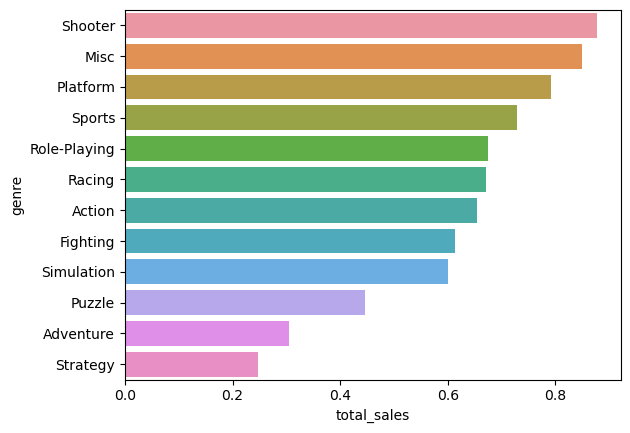

In [91]:
sns.barplot(x='total_sales', y='genre', data=grouped_genres);

- **The most profitable genres are 'Shooter', 'Misc' and 'Platform' games.**

- **'Strategy', 'Adventure' and 'Puzzle' games are the least profitable games.**

- We will look the **correlation** tables for **genres**.

In [92]:
for genre in grouped_genres.genre.unique():
    corr = genre_games.loc[genre_games.genre == genre].corr().loc['total_sales':'user_score', 'total_sales':'user_score']
    print("\n{} genre's correlation table:\n\n{}\n\n\n".format(genre, corr))


Shooter genre's correlation table:

              total_sales  critic_score  user_score
total_sales      1.000000      0.325299   -0.026778
critic_score     0.325299      1.000000    0.602087
user_score      -0.026778      0.602087    1.000000




Misc genre's correlation table:

              total_sales  critic_score  user_score
total_sales      1.000000      0.092192    0.077119
critic_score     0.092192      1.000000    0.683332
user_score       0.077119      0.683332    1.000000




Platform genre's correlation table:

              total_sales  critic_score  user_score
total_sales      1.000000      0.280957    0.182810
critic_score     0.280957      1.000000    0.716859
user_score       0.182810      0.716859    1.000000




Sports genre's correlation table:

              total_sales  critic_score  user_score
total_sales      1.000000      0.105112    0.048122
critic_score     0.105112      1.000000    0.650428
user_score       0.048122      0.650428    1.000000




Role-Playi

- There is **no correlation between the sales and reviews for genres.**

<a id='3.2.'></a>
## 3.2. Step Conclusion

- **'PS2', 'X360', 'PS3', 'Wii', 'DS', and 'PS' have the biggest sales for all times.** They are over $700.000.

- **'PS', 'PS2' and 'DS'** platform's global sales used to be popular, but now their sales are zero.

- It takes generally **about 4-5 years for new platforms to appear** and **4-5 years for old ones to fade**. The average lifetime of the popular platforms is **between 8-10 years**. 

- We took the data **for last 3 years to analyze**, *because in 3 years many platforms' sales can change in significant degree*,

- **'PS4', 'XOne' and '3DS' are leading in sales for the last years**, *although 'PS2' has the biggest global sales for all times*.

- According to the global sales graphics of 10 game platforms in the last years;

        - PS4, 3DS, XOne have still big sales (> $10 mil.)

        - PSP now has zero sales,

        - All other platforms are shrinking, some of them are close to zero (X360, Wii),
    
- In accordance with the sales of 2016, **the most profitable platforms are PS4 (70), XOne (30), 3DS (15) with 2016 values for 2017 expectations**.

- 'PS2', 'X360', and 'PS3' have the **biggest total global salesthe**, while 'GB', 'NES' and 'GEN' have the **biggest average sales for all timethe**. The reason of this is *the difference in the game amount produced by the platforms.* 'PS2', 'DS', and 'PS3' have more games than other platforms.

- 'GB', 'NES' and 'GEN' were old platforms and existed since 1983 to 2001 years. At the time, there could be many reasons for that but **probably the price of a game was more expensive**.

- We took **"PS4"** platform to analyze **because it has more data and bigger sales** than others in our still trending and popular platforms.

        - There is weak correlation between sales and critic_scores for PS4,

        - (0.40-0.45 for global and other regions; 0.34 for EU; 0.32 for JP),
 
- There is **no correlation between sales and user_scores**.

        - (close to '0' for all regions)

- We filtered the same game names of PS4 platform for other platforms to analyze the other games.

- Wii platform has the highest correlation values. There is a **strong linear relation between total sales and user score (0.70) for Wii platform**. The other platforms have no meaningful correlation.

- There are **mostly 'Action' games** in the table. **'Sports' and 'Shooter' are the second and third genres**.

- **The most profitable genres are 'Shooter', 'Misc' and 'Platform' games.**

- **'Strategy', 'Adventure' and 'Puzzle' games are the least profitable games.**

- There is **no correlation between the sales and reviews for genres.**

<a id='Step4'></a>
# Step 4. Create a user profile for each region

<a id='4.1.'></a>
## 4.1. Analysis the platforms and genres for each region (NA, EU, JP)

- We will find the **top five platforms for each region.**

In [93]:
aggregations = {'year_of_release':'first', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 
                'total_sales':'sum', 'critic_score':'mean', 'user_score':'mean', 
                'rating': lambda x: x.mode()}

game_platforms = (games_scores
                  .groupby('platform', as_index=False)
                  .agg(aggregations).sort_values(by='total_sales')
                  .sort_values(by='total_sales', ascending=False)
                  .reset_index(drop=True)
                 )

display(game_platforms)

platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0       PS2             2004    503.47    277.88     77.72       159.46   
1      X360             2010    558.29    244.26     10.17        78.77   
2       PS3             2013    359.83    291.59     58.67       121.50   
3       Wii             2006    383.58    215.39     52.93        64.10   
4        DS             2006    222.56    117.33     86.76        36.61   
5       PS4             2014     84.70    112.90      9.48        38.06   
6        PS             1997    105.70     75.74     41.39        13.24   
7        XB             2004    165.89     53.87      1.20         7.66   
8        PC             2009     72.39    113.90      0.17        19.12   
9       PSP             2005     91.41     53.18     25.67        34.26   
10      GBA             2004    107.56     43.71     17.08         4.32   
11       GC             2001    116.61     33.12     16.12         4.46   
12     XOne             2014     78.66     43.44      0.29        12.03   
13      3DS             2011     50.45     34.69     34.11         7.93   
14     WiiU             2014     31.28     21.03     10.17         4.91   
15      PSV             2011     10.32      9.95      8.51         4.97   
16       DC             1999      1.54      0.29      2.66         0.06   

    total_sales  critic_score  user_score rating  
0       1018.53     68.692290    7.532741      T  
1        891.49     67.141124    6.706189      T  
2        831.59     69.118202    6.735063      T  
3        716.00     62.419136    6.780448      E  
4        463.26     64.252435    6.875367      E  
5        245.14     71.787355    6.752175      T  
6        236.07     71.645427    7.615099      E  
7        228.62     69.960037    7.383313      T  
8        205.58     75.733911    7.077915      T  
9        204.52     67.292454    7.146079      T  
10       172.67     67.457614    7.282106      E  
11       170.31     69.746924    7.446454      E  
12       134.42     72.301617    6.550637      M  
13       127.18     66.070985    6.844870      E  
14        67.39     68.868329    6.951301   E10+  
15        33.75     70.699119    7.445492      T  
16         4.55     87.357143    8.528571      T

In [94]:
na_top_platforms = game_platforms.sort_values(by='na_sales', ascending=False).reset_index().head()
eu_top_platforms = game_platforms.sort_values(by='eu_sales', ascending=False).reset_index().head()
jp_top_platforms = game_platforms.sort_values(by='jp_sales', ascending=False).reset_index().head()

In [95]:
display('N O R T H   A M E R I C A   T O P   F I V E   P L A T F O R M S ', na_top_platforms)
display("E U R O P I A N   U N I O N   T O P   F I V E   P L A T F O R M S ", eu_top_platforms)
display("J A P A N   T O P   F I V E   P L A T F O R M S", jp_top_platforms)

'N O R T H   A M E R I C A   T O P   F I V E   P L A T F O R M S '

index platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0      1     X360             2010    558.29    244.26     10.17        78.77   
1      0      PS2             2004    503.47    277.88     77.72       159.46   
2      3      Wii             2006    383.58    215.39     52.93        64.10   
3      2      PS3             2013    359.83    291.59     58.67       121.50   
4      4       DS             2006    222.56    117.33     86.76        36.61   

   total_sales  critic_score  user_score rating  
0       891.49     67.141124    6.706189      T  
1      1018.53     68.692290    7.532741      T  
2       716.00     62.419136    6.780448      E  
3       831.59     69.118202    6.735063      T  
4       463.26     64.252435    6.875367      E

'E U R O P I A N   U N I O N   T O P   F I V E   P L A T F O R M S '

index platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0      2      PS3             2013    359.83    291.59     58.67       121.50   
1      0      PS2             2004    503.47    277.88     77.72       159.46   
2      1     X360             2010    558.29    244.26     10.17        78.77   
3      3      Wii             2006    383.58    215.39     52.93        64.10   
4      4       DS             2006    222.56    117.33     86.76        36.61   

   total_sales  critic_score  user_score rating  
0       831.59     69.118202    6.735063      T  
1      1018.53     68.692290    7.532741      T  
2       891.49     67.141124    6.706189      T  
3       716.00     62.419136    6.780448      E  
4       463.26     64.252435    6.875367      E

'J A P A N   T O P   F I V E   P L A T F O R M S'

index platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0      4       DS             2006    222.56    117.33     86.76        36.61   
1      0      PS2             2004    503.47    277.88     77.72       159.46   
2      2      PS3             2013    359.83    291.59     58.67       121.50   
3      3      Wii             2006    383.58    215.39     52.93        64.10   
4      6       PS             1997    105.70     75.74     41.39        13.24   

   total_sales  critic_score  user_score rating  
0       463.26     64.252435    6.875367      E  
1      1018.53     68.692290    7.532741      T  
2       831.59     69.118202    6.735063      T  
3       716.00     62.419136    6.780448      E  
4       236.07     71.645427    7.615099      E

- **X360 platform is the most popular platform in 'North America'** although it's not popular in Japan.

- **PS2 is the second popular platform for all regions**. We had known that it had *the biggest sales over 1.000 million dollars*, **but it is not on the markets now**. The sales of PS2 games are **now '0'**.

- **PS3, Wii and DS are in top five list for all region**. Wii and PS3 are on descending course and almost '0' when we analyzed the last decade. DS platform is '0' sales for a few years. [See the graph](#PlatformSalesGraph)

- **PS is in top five list for Japan**.

- **'Teen' and 'Everyone' games are mostly for all regions**.

- Let's see on the graphs.

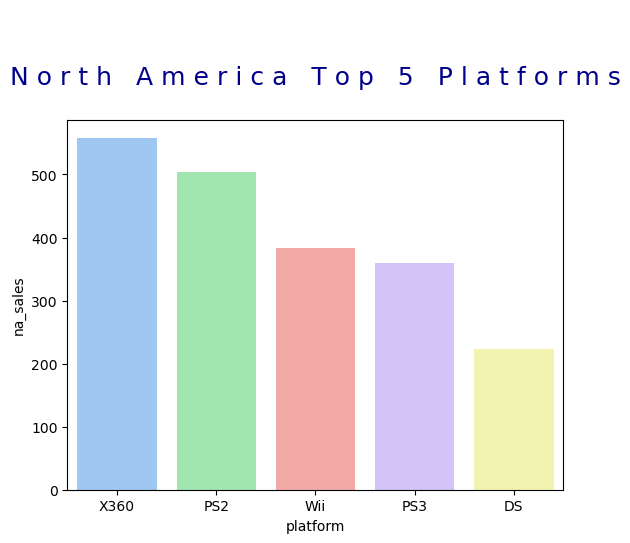

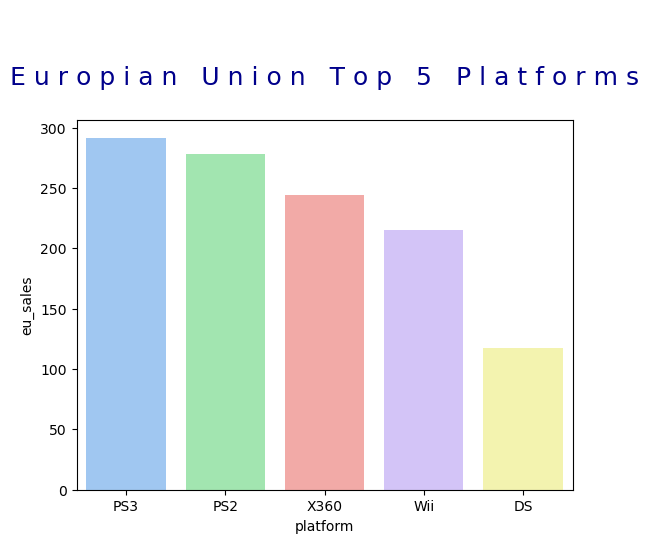

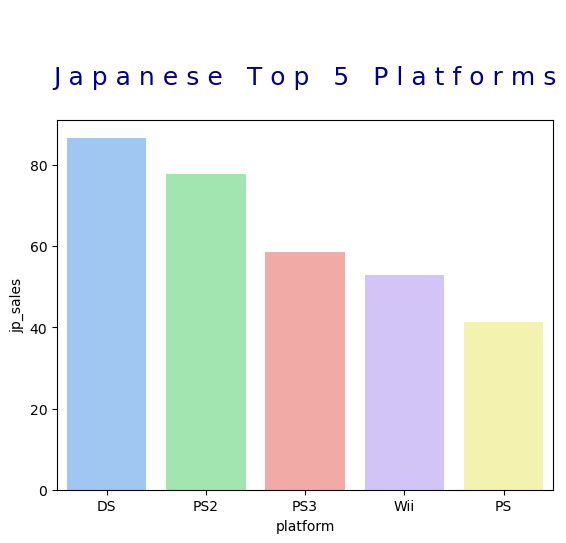

<Figure size 640x480 with 0 Axes>

In [96]:
sns.barplot(x="platform", y="na_sales", data=na_top_platforms);
plt.title("\n\nN o r t h   A m e r i c a   T o p   5   P l a t f o r m s\n", color="darkblue", size=18)
plt.show();
plt.clf()

sns.barplot(x="platform", y="eu_sales", data=eu_top_platforms);
plt.title("\n\nE u r o p i a n   U n i o n   T o p   5   P l a t f o r m s\n", color="darkblue", size=18)
plt.show()
plt.clf()

sns.barplot(x="platform", y="jp_sales", data=jp_top_platforms);
plt.title("\n\nJ a p a n e s e   T o p   5   P l a t f o r m s\n", color="darkblue", size=18)
plt.show()
plt.clf()

- We will find the **top five genres for each region**.

In [97]:
aggregations = {'year_of_release':'first', 'na_sales':'mean', 'eu_sales':'mean', 'jp_sales':'mean', 'other_sales':'mean', 
                'total_sales':'mean', 'critic_score':'mean', 'user_score':'mean', 
                'rating': lambda x: x.mode()}

game_genres = (games_scores
                  .groupby('genre', as_index=False)
                  .agg(aggregations).sort_values(by='total_sales')
                  .sort_values(by='total_sales', ascending=False)
                  .reset_index(drop=True)
                 )

display(game_genres)

genre  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0        Shooter             2011  0.481931  0.281493  0.019916     0.094687   
1           Misc             2006  0.459419  0.244011  0.060690     0.085808   
2       Platform             2006  0.412102  0.227485  0.085108     0.067662   
3         Sports             2006  0.399711  0.216995  0.029110     0.083396   
4   Role-Playing             1997  0.295060  0.159668  0.165286     0.054409   
5         Racing             2008  0.324718  0.228716  0.037877     0.081101   
6         Action             2013  0.325936  0.209610  0.039875     0.079029   
7       Fighting             2008  0.334537  0.148979  0.067696     0.063064   
8     Simulation             2005  0.274974  0.198307  0.075052     0.051432   
9         Puzzle             2005  0.205778  0.134222  0.070800     0.034667   
10     Adventure             2007  0.153494  0.096108  0.026278     0.029063   
11      Strategy             2010  0.123676  0.087072  0.013832     0.022181   

    total_sales  critic_score  user_score rating  
0      0.878027     69.818711    7.032982      M  
1      0.849927     66.162634    6.816758      E  
2      0.792358     67.783139    7.200297      E  
3      0.729212     70.611046    6.971004      E  
4      0.674422     72.853076    7.608505      T  
5      0.672412     67.737982    7.005537      E  
6      0.654449     66.431703    7.004050      T  
7      0.614276     69.175774    7.255775      T  
8      0.599766     68.104798    7.073499      T  
9      0.445467     67.179362    7.020053      E  
10     0.304943     65.557224    7.076332      T  
11     0.246760     72.475936    7.288803      T

In [98]:
na_top_genres = game_genres.sort_values(by='na_sales', ascending=False).reset_index(drop=True).head()
eu_top_genres = game_genres.sort_values(by='eu_sales', ascending=False).reset_index(drop=True).head()
jp_top_genres = game_genres.sort_values(by='jp_sales', ascending=False).reset_index(drop=True).head()

In [99]:
display('N O R T H   A M E R I C A   T O P   F I V E   G E N R E S', na_top_genres)
display("E U R O P I A N   U N I O N   T O P   F I V E   G E N R E S", eu_top_genres)
display("J A P A N   T O P   F I V E   G E N R E S", jp_top_genres)

'N O R T H   A M E R I C A   T O P   F I V E   G E N R E S'

genre  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0   Shooter             2011  0.481931  0.281493  0.019916     0.094687   
1      Misc             2006  0.459419  0.244011  0.060690     0.085808   
2  Platform             2006  0.412102  0.227485  0.085108     0.067662   
3    Sports             2006  0.399711  0.216995  0.029110     0.083396   
4  Fighting             2008  0.334537  0.148979  0.067696     0.063064   

   total_sales  critic_score  user_score rating  
0     0.878027     69.818711    7.032982      M  
1     0.849927     66.162634    6.816758      E  
2     0.792358     67.783139    7.200297      E  
3     0.729212     70.611046    6.971004      E  
4     0.614276     69.175774    7.255775      T

'E U R O P I A N   U N I O N   T O P   F I V E   G E N R E S'

genre  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0   Shooter             2011  0.481931  0.281493  0.019916     0.094687   
1      Misc             2006  0.459419  0.244011  0.060690     0.085808   
2    Racing             2008  0.324718  0.228716  0.037877     0.081101   
3  Platform             2006  0.412102  0.227485  0.085108     0.067662   
4    Sports             2006  0.399711  0.216995  0.029110     0.083396   

   total_sales  critic_score  user_score rating  
0     0.878027     69.818711    7.032982      M  
1     0.849927     66.162634    6.816758      E  
2     0.672412     67.737982    7.005537      E  
3     0.792358     67.783139    7.200297      E  
4     0.729212     70.611046    6.971004      E

'J A P A N   T O P   F I V E   G E N R E S'

genre  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0  Role-Playing             1997  0.295060  0.159668  0.165286     0.054409   
1      Platform             2006  0.412102  0.227485  0.085108     0.067662   
2    Simulation             2005  0.274974  0.198307  0.075052     0.051432   
3        Puzzle             2005  0.205778  0.134222  0.070800     0.034667   
4      Fighting             2008  0.334537  0.148979  0.067696     0.063064   

   total_sales  critic_score  user_score rating  
0     0.674422     72.853076    7.608505      T  
1     0.792358     67.783139    7.200297      E  
2     0.599766     68.104798    7.073499      T  
3     0.445467     67.179362    7.020053      E  
4     0.614276     69.175774    7.255775      T

- **'Shooter', 'Misc', 'Sports' and 'Platform'** genres are **most popular in 'NA' and 'EU'**, while **'Platform' is popular in Japan** only from them.

- **'Role-Playing' is the toppest genre in Japan**. **'Simulation', 'Puzzle' and 'Fighting'** also in top five list of **Japan**.

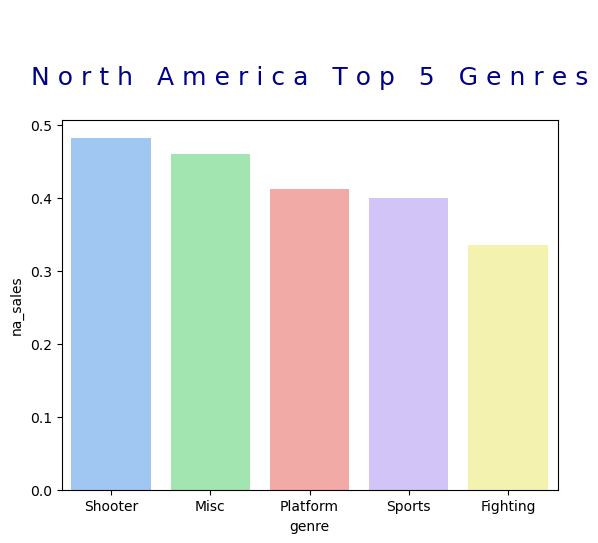

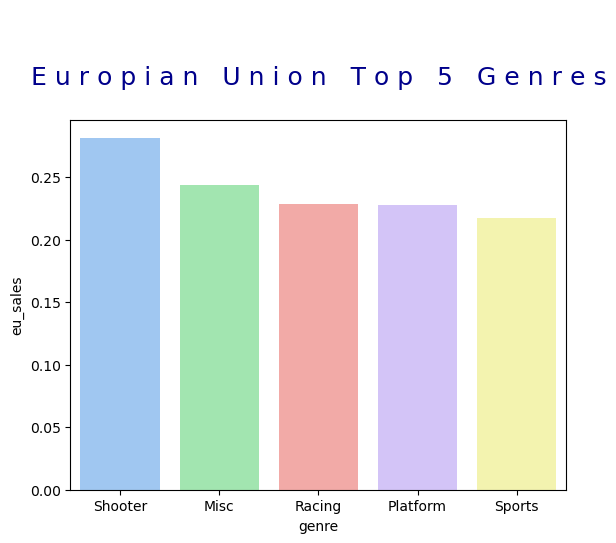

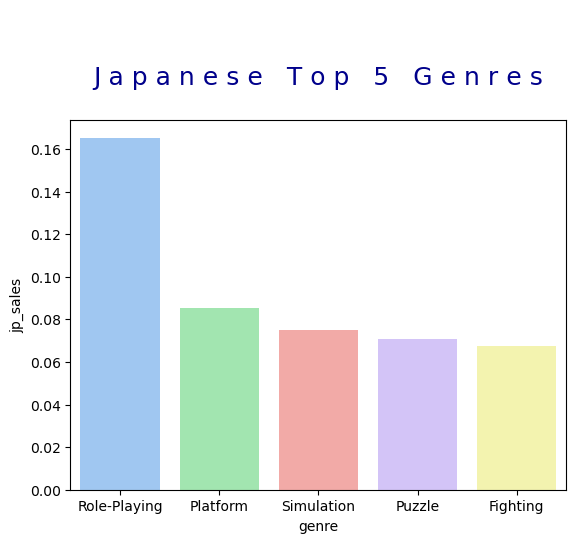

<Figure size 640x480 with 0 Axes>

In [100]:
sns.barplot(x="genre", y="na_sales", data=na_top_genres);
plt.title("\n\nN o r t h   A m e r i c a   T o p   5   G e n r e s\n", color="darkblue", size=18)
plt.show();
plt.clf()

sns.barplot(x="genre", y="eu_sales", data=eu_top_genres);
plt.title("\n\nE u r o p i a n   U n i o n   T o p   5   G e n r e s\n", color="darkblue", size=18)
plt.show()
plt.clf()

sns.barplot(x="genre", y="jp_sales", data=jp_top_genres);
plt.title("\n\nJ a p a n e s e   T o p   5   G e n r e s\n", color="darkblue", size=18)
plt.show()
plt.clf()

<a id='4.2.'></a>
## 4.2. Step Conclusion

- **X360 platform is the most popular platform in 'North America'** although it's not popular in Japan.

- PS2 is the second popular platform for all regions with sales over 1.000 million dollars, but it is not on the markets now. The sales of PS2 games are now '0'.

- **PS3, Wii and DS are in top five list for all region**. DS sales are now '0' for a few years. The others are almost 0, at the end of their lifecycles. [See the graph](#PlatformSalesGraph)

- PS is in top five list for Japan, but it appears in 1997.

- *'Teen' and 'Everyone' games are mostly for all platforms for regions.*

- *'Shooter', 'Misc', 'Sports' and 'Platform' genres are most popular in 'NA' and 'EU'*, while *'Platform' genre is popular in Japan only from them.*

- *'Role-Playing' is the toppest genre in Japan. 'Simulation', 'Puzzle' and 'Fighting' also in top five list of Japan.*

- As a result, **the best option is 'X360' platform and it depends on the regions to choose genre.** *('Shooter' genre for 'NA' and 'EU', 'Role-Playing' genre for 'JP' are best options.)*

- *'Mature' rating is the most popular games for 'NA' and 'JP'. 'Teen' and 'Everyone' kept their significance for genres.*

- We can not know the exact reason of differences, but *probably cultural differences are the reason of genre choice for Japan.*

<a id='Step5'></a>
# Step 5. Tests of the hypotheses 

- We will do students' t-tests:

For platforms;
        
        - H0: Average user ratings of the Xbox One and PC platforms are the same.
        - H1: Average user ratings of the Xbox One and PC platforms are different.

For genres;

        - H0: Average user ratings for the Action and Sports genres are the same.
        - H1: Average user ratings for the Action and Sports genres are different.

<a id='5.1.'></a>
## 5.1. Average user ratings of the Xbox One and PC platforms are the same

In [101]:
xone_user_scores = games_scores.query('platform == "XOne"')['user_score']
pc_user_scores = games_scores.query('platform == "PC"')['user_score']

In [102]:
xone_user_scores

118     7.9
127     5.4
168     6.4
190     6.2
259     4.1
       ... 
8478    6.8
8491    6.0
8497    8.2
8500    6.6
8503    6.7
Name: user_score, Length: 185, dtype: float64

In [103]:
pc_user_scores

57      7.6
94      7.3
134     4.0
149     8.2
199     9.1
       ... 
8508    8.1
8509    7.6
8511    5.8
8514    7.2
8515    5.8
Name: user_score, Length: 765, dtype: float64

<a id='5.1.1.'></a>
### 5.1.1. Levene Test

- We will use **st.levene method to find the meaning of variance differences**. Let's formulate our hypotheses for levene test.

- **H0: 'The variances of Xbox One and PC platforms' user scores are the same.'**
    (var for surf = var for ultimate)
- **H1: 'The variances of Xbox One and PC platforms' user scores are not the same.'**
    (var for surf < > var for ultimate)
- alpha = 0.05

*If the p-value is smaller than the alpha, then we can't assume that the variances are equal.*

In [104]:
alpha = 0.05

results = st.levene(xone_user_scores, pc_user_scores)

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 0.1664491494302526
Equal variances assumed


<a id='5.1.2.'></a>
### 5.1.2. Students' T-Test

- **H0: 'The average user scores of Xbox One and PC platforms are the same.'**
    (µ1 = µ2)
- **H1: 'The average user scores of Xbox One and PC platforms are not the same.'** 
    (µ1 < > µ2)
    
- alpha = 0.05

- We will use the **'scipy.stat.ttest_ind'** to test our hypotheses. *The 'equal_var' parameter will be 'True'* since we assumed the variances are the same. *If the p-value is bigger than the significance level (alpha), we will fail to reject the null hypothesis.* Otherwise we will reject the null hypothesis.

In [105]:
alpha = 0.05

results = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var=True)

print("p-value: {}".format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.4574174714826783e-05
We reject the null hypothesis


- We reject the null hypothesis because **p-value is too small**, so it means that **the difference statistic is big**. We assumed that **the average Xbox One platform user scores and the average PC platform user scores are not the same**.

In [106]:
print("Xbox One platform's user scores mean is '{:.2f}'.".format(xone_user_scores.mean()))
print("PC platform's user scores mean is '{:.2f}'.".format(pc_user_scores.mean()))

Xbox One platform's user scores mean is '6.55'.
PC platform's user scores mean is '7.08'.


- We can say that **the mean value of the PC platform of user scores is bigger than Xbox One.**

<a id='5.2.'></a>
## 5.2. Average user ratings for the Action and Sports genres are different

In [107]:
action_user_scores = games_scores.query('genre == "Action"')['user_score']
sports_user_scores = games_scores.query('genre == "Sports"')['user_score']

<a id='5.2.1.'></a>
### 5.2.1. Levene Test

- **H0: 'The variances of 'Action' and 'Sports' genres' user scores are the same.'**
    (var for surf = var for ultimate)
- **H1: 'The variances of 'Action' and 'Sports' genres' user scores are not the same.'** 
    (var for surf < > var for ultimate)
- alpha = 0.05

*If the p-value is smaller than the alpha, then we can't assume the variances are not the same.*

In [108]:
alpha = 0.05

results = st.levene(action_user_scores, sports_user_scores)

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 0.04726845937179506
Different variances assumed


<a id='5.2.2.'></a>
### 5.2.2. Students' T-Test

- **H0: 'The average user scores of 'Action' and 'Sports' genres' are the same.'**
    (µ1 = µ2)
- **H1: 'The average user scores of 'Action' and 'Sports' genres' are not the same.'** 
    (µ1 < > µ2)
    
- alpha = 0.05

- We will use the **'scipy.stat.ttest_ind'** to test our hypotheses. The **'equal_var' parameter will be 'False'** since we assumed the variances are not the same. *If the p-value is smaller than the significance level (alpha), we can reject the null hypothesis.* Otherwise we'll fail to reject the null hypothesis.

In [109]:
alpha = 0.05

results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

print("p-value: {}".format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.5083853327780364
We can't reject the null hypothesis


- **We can't reject the null hypothesis, so the average user scores of "Action" and "Sports" are assumed equal.**

In [110]:
display(action_user_scores.mean())
display(sports_user_scores.mean())

7.00405029271974

6.97100441379685

In [111]:
display(action_user_scores.describe())
display(sports_user_scores.describe())

count    1998.000000
mean        7.004050
std         1.351741
min         1.200000
25%         6.300000
50%         7.200000
75%         8.000000
max         9.500000
Name: user_score, dtype: float64

count    1281.000000
mean        6.971004
std         1.423342
min         0.700000
25%         6.200000
50%         7.200000
75%         8.000000
max         9.500000
Name: user_score, dtype: float64

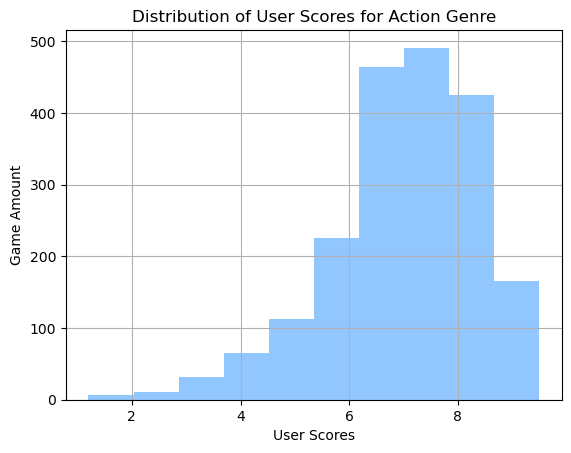

In [112]:
action_user_scores.hist()
plt.title("Distribution of User Scores for Action Genre")
plt.xlabel("User Scores")
plt.ylabel("Game Amount");

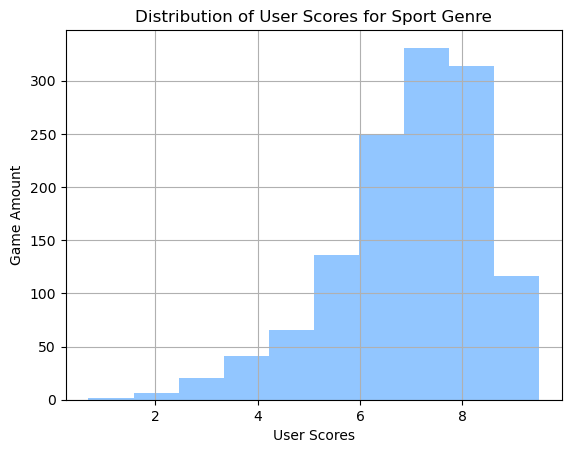

In [113]:
sports_user_scores.hist()
plt.title("Distribution of User Scores for Sport Genre")
plt.xlabel("User Scores")
plt.ylabel("Game Amount");

- The **mean values** and **standart deviations** of two genres are **so close**. 
- The distributions of two genres are so similar. p-value is bigger than 0.5. So **we can't reject the null hypothesis.** 
- We assume that **the average values for Sport and Action genres are the same.**

<a id='5.3.'></a>
## 5.3. Step Conclusion

As a result for user ratings;
        
- **We rejected the null hypothesis because p-value was too small.** According to our alternative hypothesis, we assumed that the user ratings of the XBox One and PC platforms are not same.

        - H1: Average user ratings of the Xbox One and PC platforms are not the same.

For genres;

- There are the average user scores of "Action" and "Sports" are assumed equal. **We were not able to fail to reject the null hypothesis.**

        - H0: Average user ratings for the Action and Sports genres are the same.

<a id='Step6'></a>
# Step 6. General Conclusion

- We *prepared the data, analyzed the missing values, separated our dataset into two parts*. **'games'** shows us only the sales information, not reviews. The other table is **'games_scores'** and we *dropped the missing values for them* after filling some missing and 'tbd' values in the 'critic_score' and 'user_score'.


- We didn't find any significant correlation between **'total_sales' and 'user_score' or 'critic_score'**.


- We *didn't define any outliers.*


- **'PS2', 'X360', 'PS3', 'Wii', 'DS', and 'PS'** have the **biggest sales for all times.** They are over $700.000.


- **'PS', 'PS2' and 'DS'** platform's global sales used to be popular, *but now their sales are zero.*


- We considered **the average lifetime as 10 years.** We analyzed after 2013, **for last 3 years.** 


- **'PS4', 'XOne' and '3DS**' are **leading in sales for the last years**, although PS2 has the biggest global sales for all times. 


- According to the global sales graphics of 10 game platforms in the last years;
    
    - **PS4, 3DS, XOne have still big sales and it is expected that they will be the most profitable games for the next year**,
    
    - PSP now have zero sales,
    
    - All other platforms are shrinking, some of them are close to zero (X360, Wii),
    

- According to the sales of 2016, the most profitable platforms will be **4-year old PS4 (70), 4-year old XOne (30), 6-year old 3DS (15)** with 2016 values for 2017 expectations.


- *'PS2', 'X360', and 'PS3'* have biggest total global sales, while 'GB', 'NES' and 'GEN' have biggest average sales for all time. The reason of this is the difference in the game amount produced by the platforms. 'PS2', 'DS', and 'PS3' have more games than other platforms.


- *'GB', 'NES' and 'GEN'* were old platforms and existed since 1983 to 2001 years. 


- There is **weak correlation between sales and critic_scores for PS4**,

        - (0.40-0.45 for global and other regions; 0.34 for EU; 0.32 for JP),
 

- There is **no correlation between sales and user_scores for PS4**,

        - (close to '0' for all regions)


- We filtered the **PS4 platform** games for other platforms to analyze the other games and we found that;

    - **Wii platform has the highest correlation values**. There is strong correlation between total sales and user score (0.70) for Wii platform. The other platforms have no meaningful correlation.

    - There are mostly 'Action' games in the table. 'Sports' and 'Shooter' are the second and third genres.

    - **The most profitable genres are 'Shooter', 'Misc' and 'Platform' games.**

    - 'Strategy', 'Adventure' and 'Puzzle' games are the least profitable games.

    - There is no correlation between the sales and reviews for genres.


- **X360 platform is the most popular platform in 'North America'** although it's not popular in Japan.


- **PS2** is the second popular platform for all regions with sales over 1.000 million dollars, but it is not on the markets now. The sales of PS2 games are now '0'.


- **PS3, Wii and DS** are in top five list for all region. DS sales are now '0' for a few years. The others are almost 0, at the end of their lifecycles.


- **PS** is in top five list for Japan, but it appears in 1997.


- Top 5 five list are generaly platforms which appears between 2000 - 2010 years except PS which appears in 1997, one of top five list of Japan.


- 'Teen' and 'Everyone' games are mostly for all platforms for regions.


- **'Shooter', 'Misc', 'Sports' and 'Platform' genres are most popular in 'NA' and 'EU', while 'Platform' genre is popular in Japan only from them.**


- **'Role-Playing' is the toppest genre in Japan.** 'Simulation', 'Puzzle' and 'Fighting' also in top five list of Japan.


- As a result, the best option is **'X360'** platform but it's a bit old fashioned. It depends on the regions to choose genre. ('Shooter' genre for 'NA' and 'EU', 'Role-Playing' genre for 'JP' are best options.)


- **'Mature'** rating is the most popular games for **'NA' and 'JP'**. 'Teen' and 'Everyone' kept their significance for 
genres.


- According to our results of students' tests, we assumed that **the average user scores of Xbox One platform and PC platform are not the same** and that **the average user scores of "Action" and "Sports" are assumed the same.**

### In Summary

1- **PS4, 3DS, XOne have still big sales and it is expected that they will be the most profitable games for the next year**

2- **For PS4, the most profitable genres are 'Shooter', 'Misc' and 'Platform' games.**

3- **For 'NA' and 'EU', the genres of 'Shooter', 'Misc', 'Sports' and 'Platform' are most populars.**

4- **For 'Japan', 'Role-Playing', 'Platform', 'Simulation', 'Puzzle' and 'Fighting' are toppest genres.**

5- **'X360' is the most popular platform. For 'NA' and 'EU' is the genre of 'Shooter' the best option, while 'Role-Playing' genre is the for 'JP'**

[Contents](#Contents)

****